## Подготовка данных

In [1]:
# os
import os
# Path
from pathlib import Path
# urllib
import urllib

# pandas
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

%config InlineBackend.figure_format = 'retina'

# библиотека для работы с математикой
import numpy as np

# библиотека для работы со статистикой
from scipy import stats as st

# Warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Создадим папку если ее нет
Path('datasets').mkdir(parents=True, exist_ok=True)
# Словарь с именем файла и ссылкой на него
urls = {
    'games' : ('*****' , '*****')
}

# Проверим есть ли файл
if not os.path.exists(urls.get('games')[1]):
    print(urls.get('games')[1], 'файл не найден, будет скачан из сети')
    # качаем файл по ссылке url, кладем по пути file_name
    urllib.request.urlretrieve(*urls.get('games'))

df = pd.read_csv(urls['games'][1])

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# shape
print(f'{df.shape[0]} samples and {df.shape[1]} features in the dataset.')

16715 samples and 11 features in the dataset.


In [5]:
# types
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


In [6]:
# Заменим tbd на nan, чтобы привести столбец к нужному типу данных
df['User_Score'].replace(to_replace ='tbd', value = np.nan, inplace=True)
df['User_Score'] = df['User_Score'].astype('float64')

In [7]:
# convert dtypes
df = df.convert_dtypes()

In [8]:
# приведем названия столбцов к нижнему регистру
df.rename(columns=str.lower, inplace=True)

In [9]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(f'Числовые колонки: {numeric_cols}')

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(f'Нечисловые колонки: {non_numeric_cols}')

Числовые колонки: ['year_of_release' 'na_sales' 'eu_sales' 'jp_sales' 'other_sales'
 'critic_score' 'user_score']
Нечисловые колонки: ['name' 'platform' 'genre' 'rating']


In [10]:
# describe
df_numeric.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [11]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  Float64
 5   eu_sales         16715 non-null  Float64
 6   jp_sales         16715 non-null  Float64
 7   other_sales      16715 non-null  Float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   Float64
 10  rating           9949 non-null   string 
dtypes: Float64(5), Int64(2), string(4)
memory usage: 1.5 MB


In [12]:
# посмотрим количество дубликатов
print(f'Dataframe has {df.duplicated().sum()} duplicates')

Dataframe has 0 duplicates


### Пропущенные значения

In [13]:
# функция для подсчета количества пропусков
def missing_data(data : pd.DataFrame):
    """
    Функция получает на вход датафрейм
    Рассчитывает абсолютные и процентные содержания пропущенных значений в каждом из признаков
    Возвращает таблицу с количеством пропущенных значений
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
user_score,9125,54.591684
critic_score,8578,51.319174
rating,6766,40.478612
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


In [14]:
# сразу избавимся от пропущенных значений, процентное содержание которых < 5%
columns_to_drop = ['year_of_release' , 'name', 'genre']
df.dropna(subset=columns_to_drop, inplace=True)

Так как основная наша задача в проекте не машинное обучение, а EDA, а пропуски в столбцах `user_score`,
`critic_score` и `rating` не представляется возможным заполнить, то мы оставляем данные значения.

## EDA

In [15]:
# добавим столбец суммарных продаж по регионам
columns_to_sum = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[columns_to_sum].sum(axis=1)

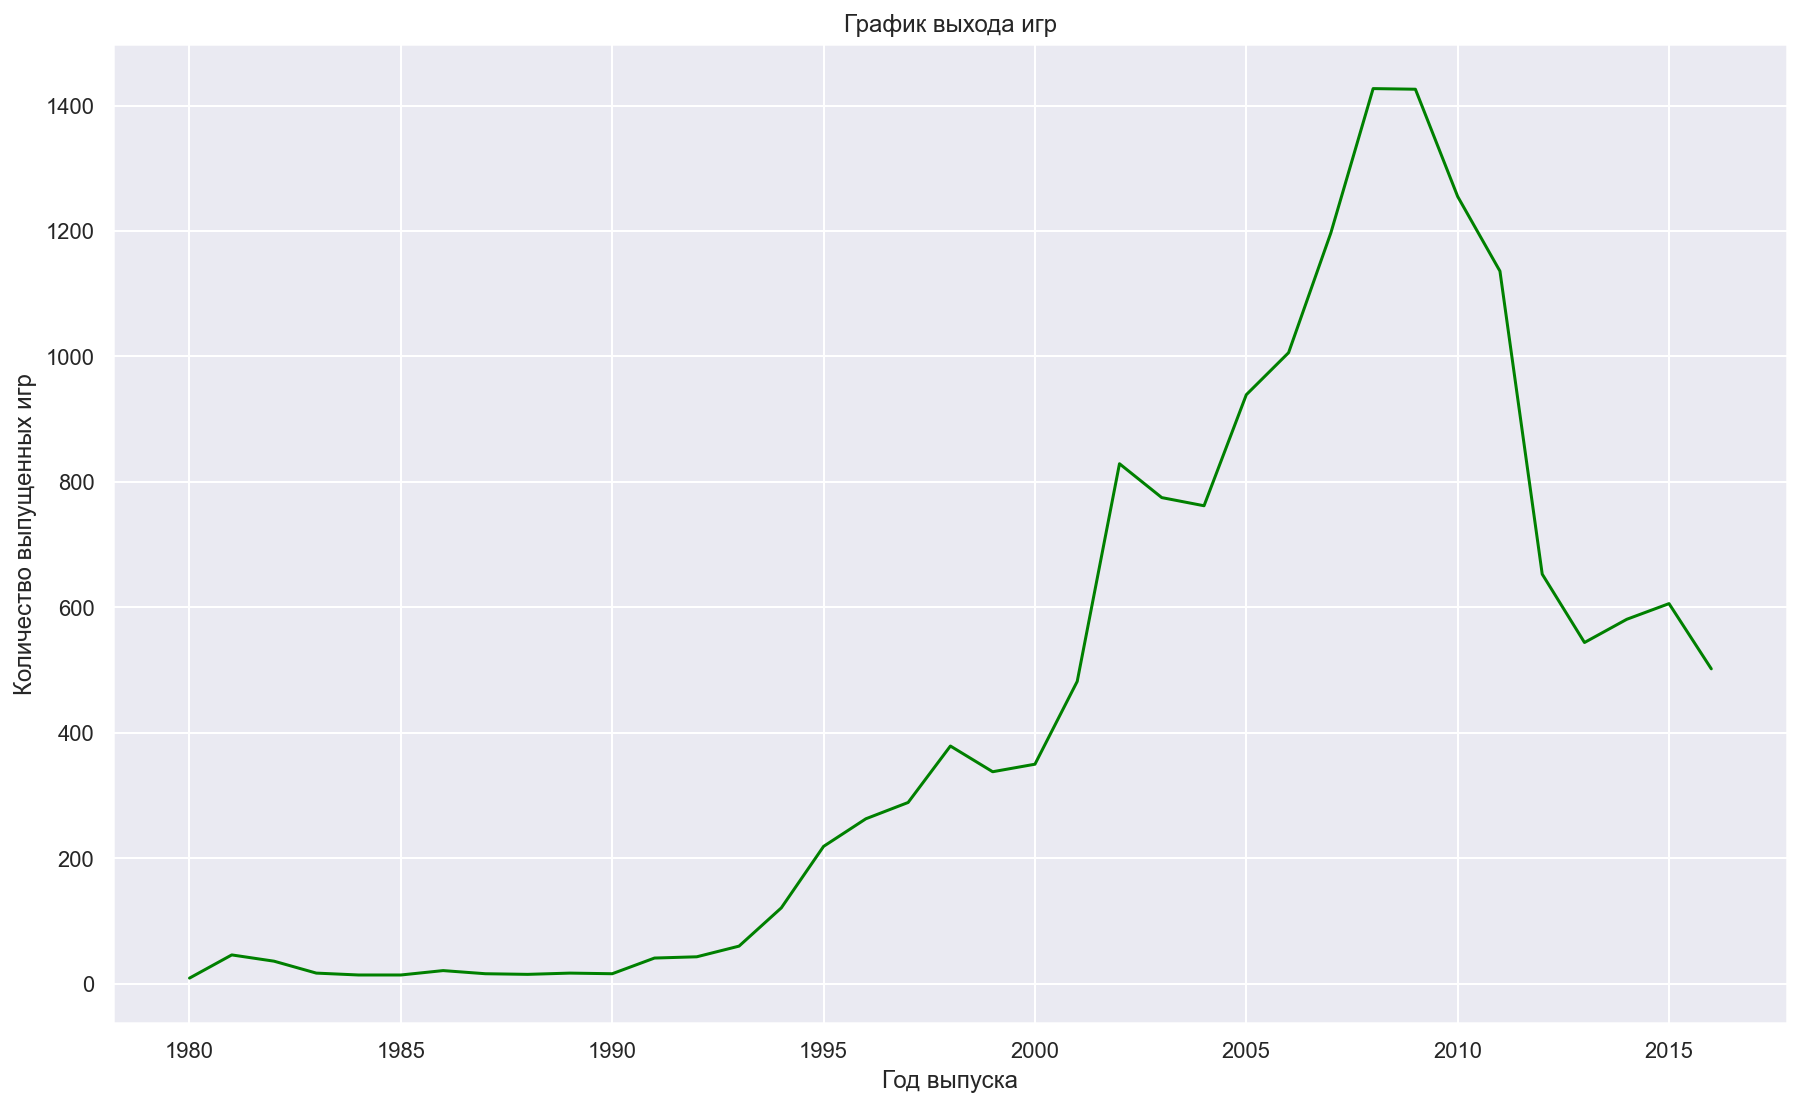

In [16]:
# построим график выхода игр
df.groupby('year_of_release')['name'].count().plot(color ='green',legend=False,grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('График выхода игр')
plt.show()

In [17]:
# посмотрим как менялись продажи по платформам
df_platform = (df
               .groupby('platform').agg({'total_sales': 'sum'})
               .sort_values(by = 'total_sales', ascending = False)
              )
df_platform = df_platform.iloc[0:6]
df_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [18]:
df_platform = df.query('platform in @df_platform.index')

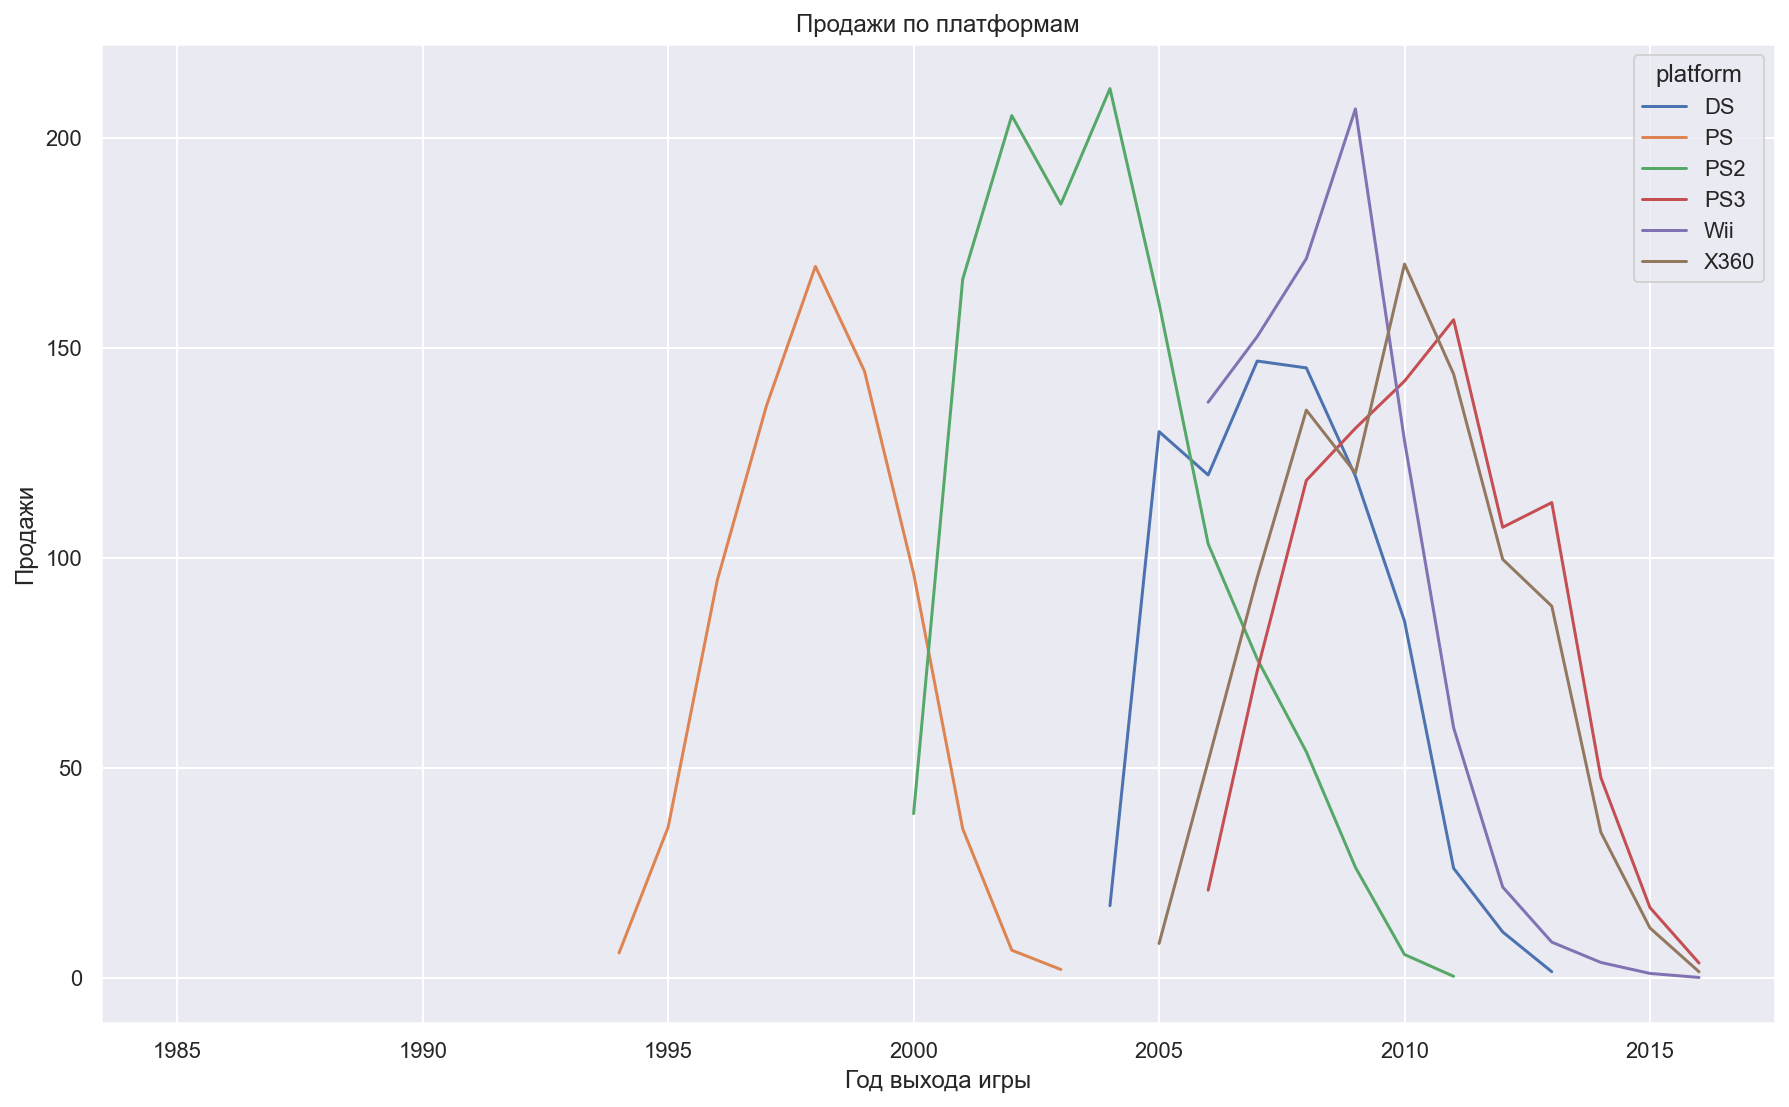

In [19]:
# построим сводную таблицу с распределением продаж
df_platform_top = df_platform.pivot_table(
                        index='year_of_release',
                        columns='platform',
                        values='total_sales',
                        aggfunc='sum')

# на основе полученной таблицы можем построить график распределения продаж по платформам по годам
df_platform_top.plot()
plt.title('Продажи по платформам')
plt.xlabel('Год выхода игры')
plt.ylabel('Продажи')
plt.show();

In [20]:
# по графику видно, что "средняя продолжительность жизни" платформы примерно 10 лет
# т.к. мы хотим смотреть именно на актуальный рынок, то ограничимся платформами вышедшеми позднее 2013, т.к. именно они и будут являтся актуальными
df_actual = df[df['year_of_release'] > 2013]

In [21]:
df_actual_earnings=df_actual.pivot_table(index='platform',values='total_sales',aggfunc='count')\
    .sort_values(by='total_sales',ascending=False)
# посмотрим на тройку "актуальных" лидеров
df_actual_earnings.head(3)

,total_sales
platform,
PS4,376
PSV,295
XOne,228


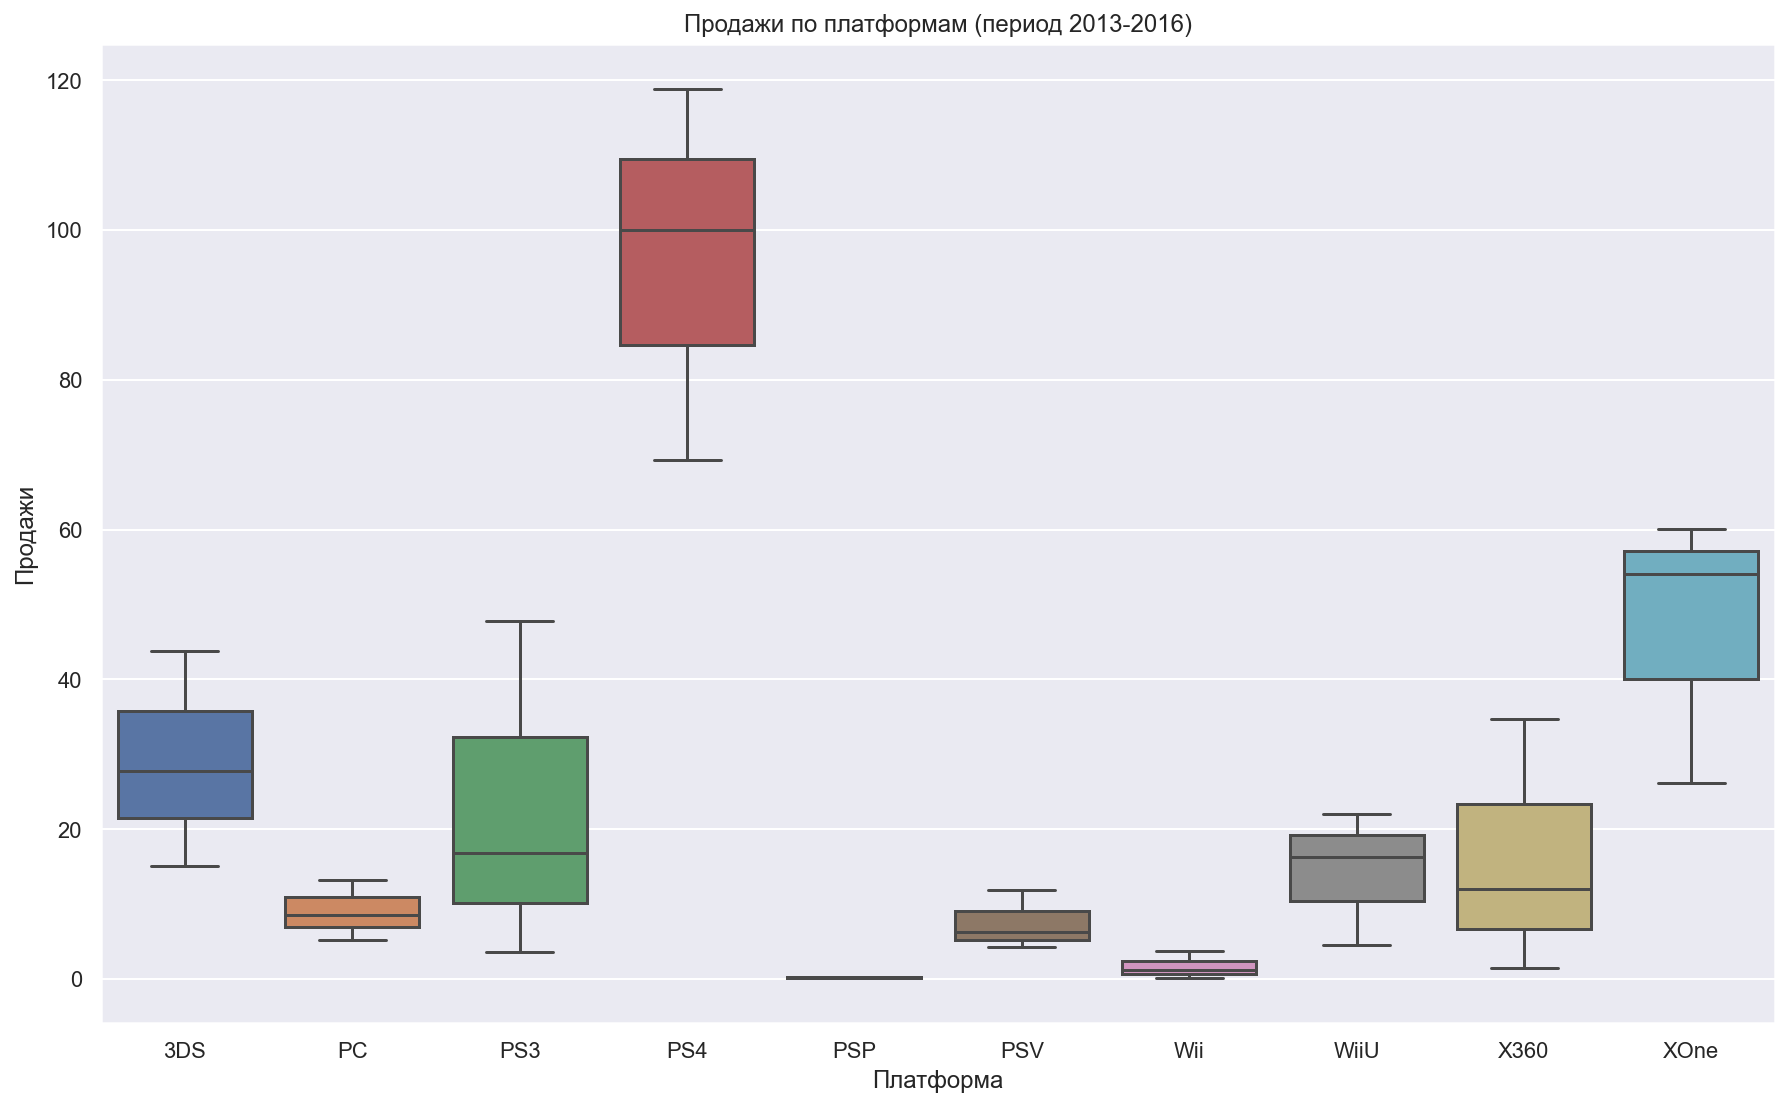

In [22]:
# PSV не кажется такой популярной платформой, как нам об этом говорят таблицы, посмотрим на графике
df_platform_actual_top = df_actual.pivot_table(
                        index='year_of_release',
                        columns='platform',
                        values='total_sales',
                        aggfunc='sum')
ax = sns.boxplot(data = df_platform_actual_top)
plt.title('Продажи по платформам (период 2013-2016)')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

XOne и PS4 явно являются фаворитами на текущий момент. Далее будем ориентироваться на игры именно на данных консолях.

In [23]:
ps4_df = df_actual[df_actual['platform'] == 'PS4']
xone_df = df_actual[df_actual['platform'] == 'XOne']

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

In [24]:
corr_list = ['total_sales', 'critic_score', 'user_score']
ps4_df[corr_list].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


In [25]:
xone_df[corr_list].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


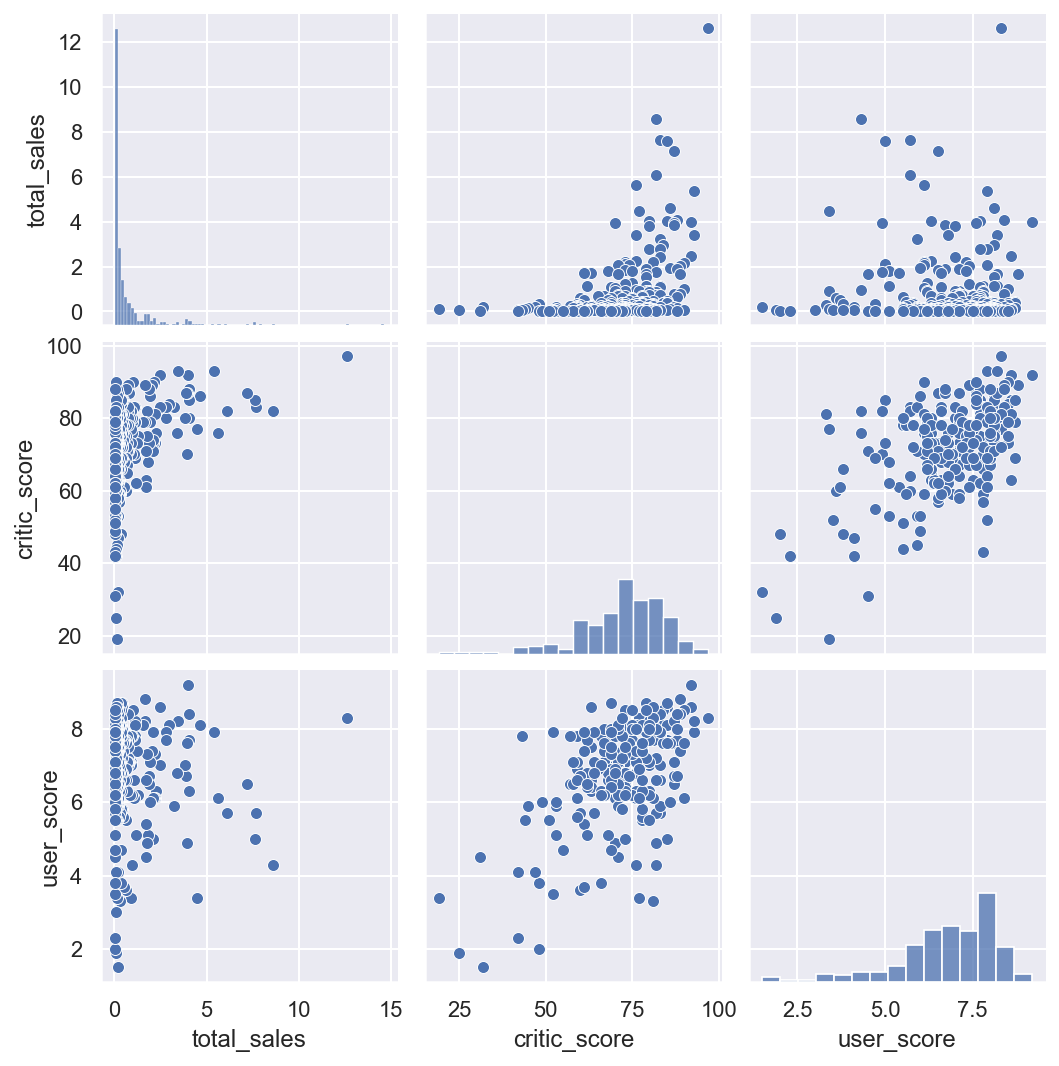

In [26]:
sns.pairplot(ps4_df[corr_list])
plt.show()

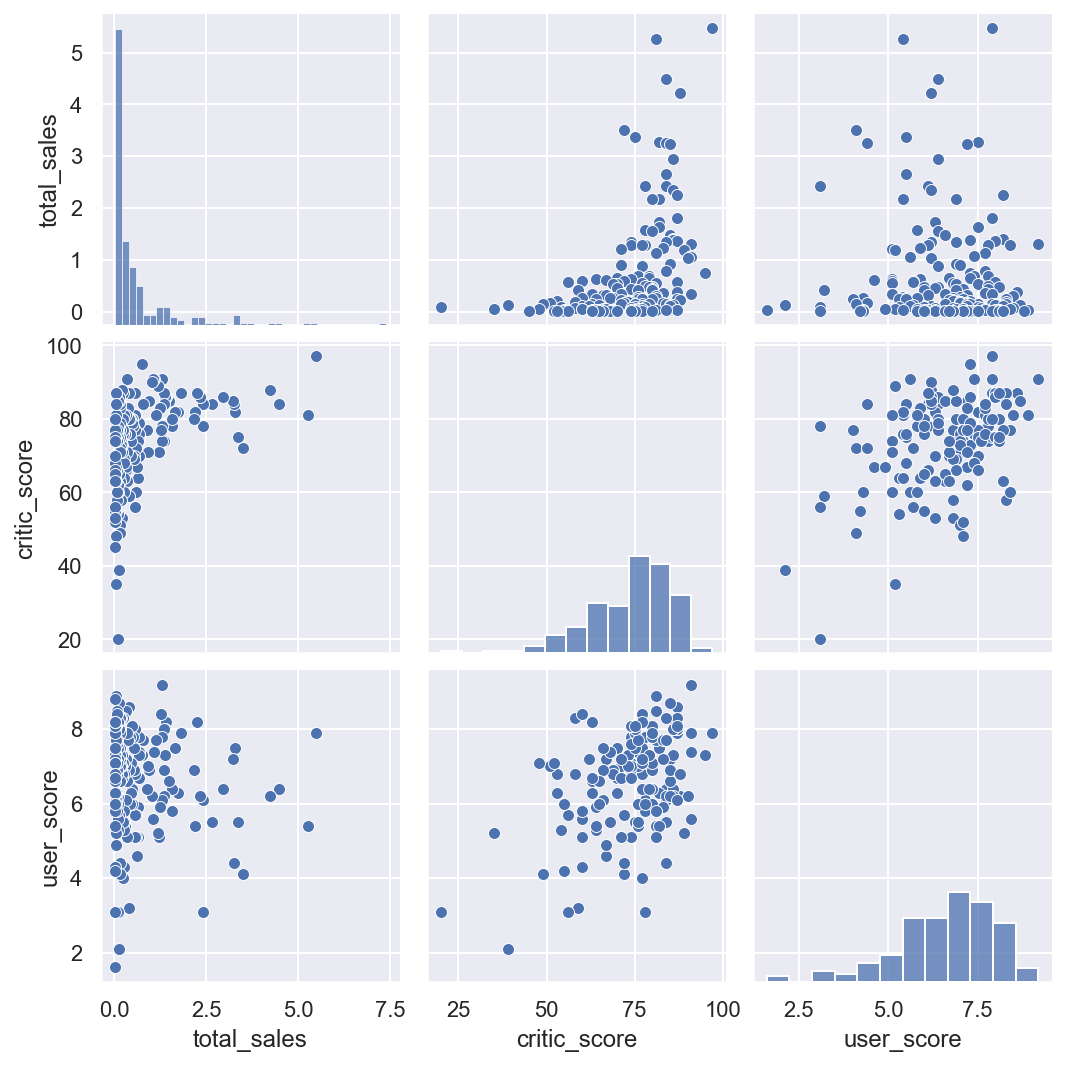

In [27]:
sns.pairplot(xone_df[corr_list])
plt.show()

**Общее распределение игр по жанрам**

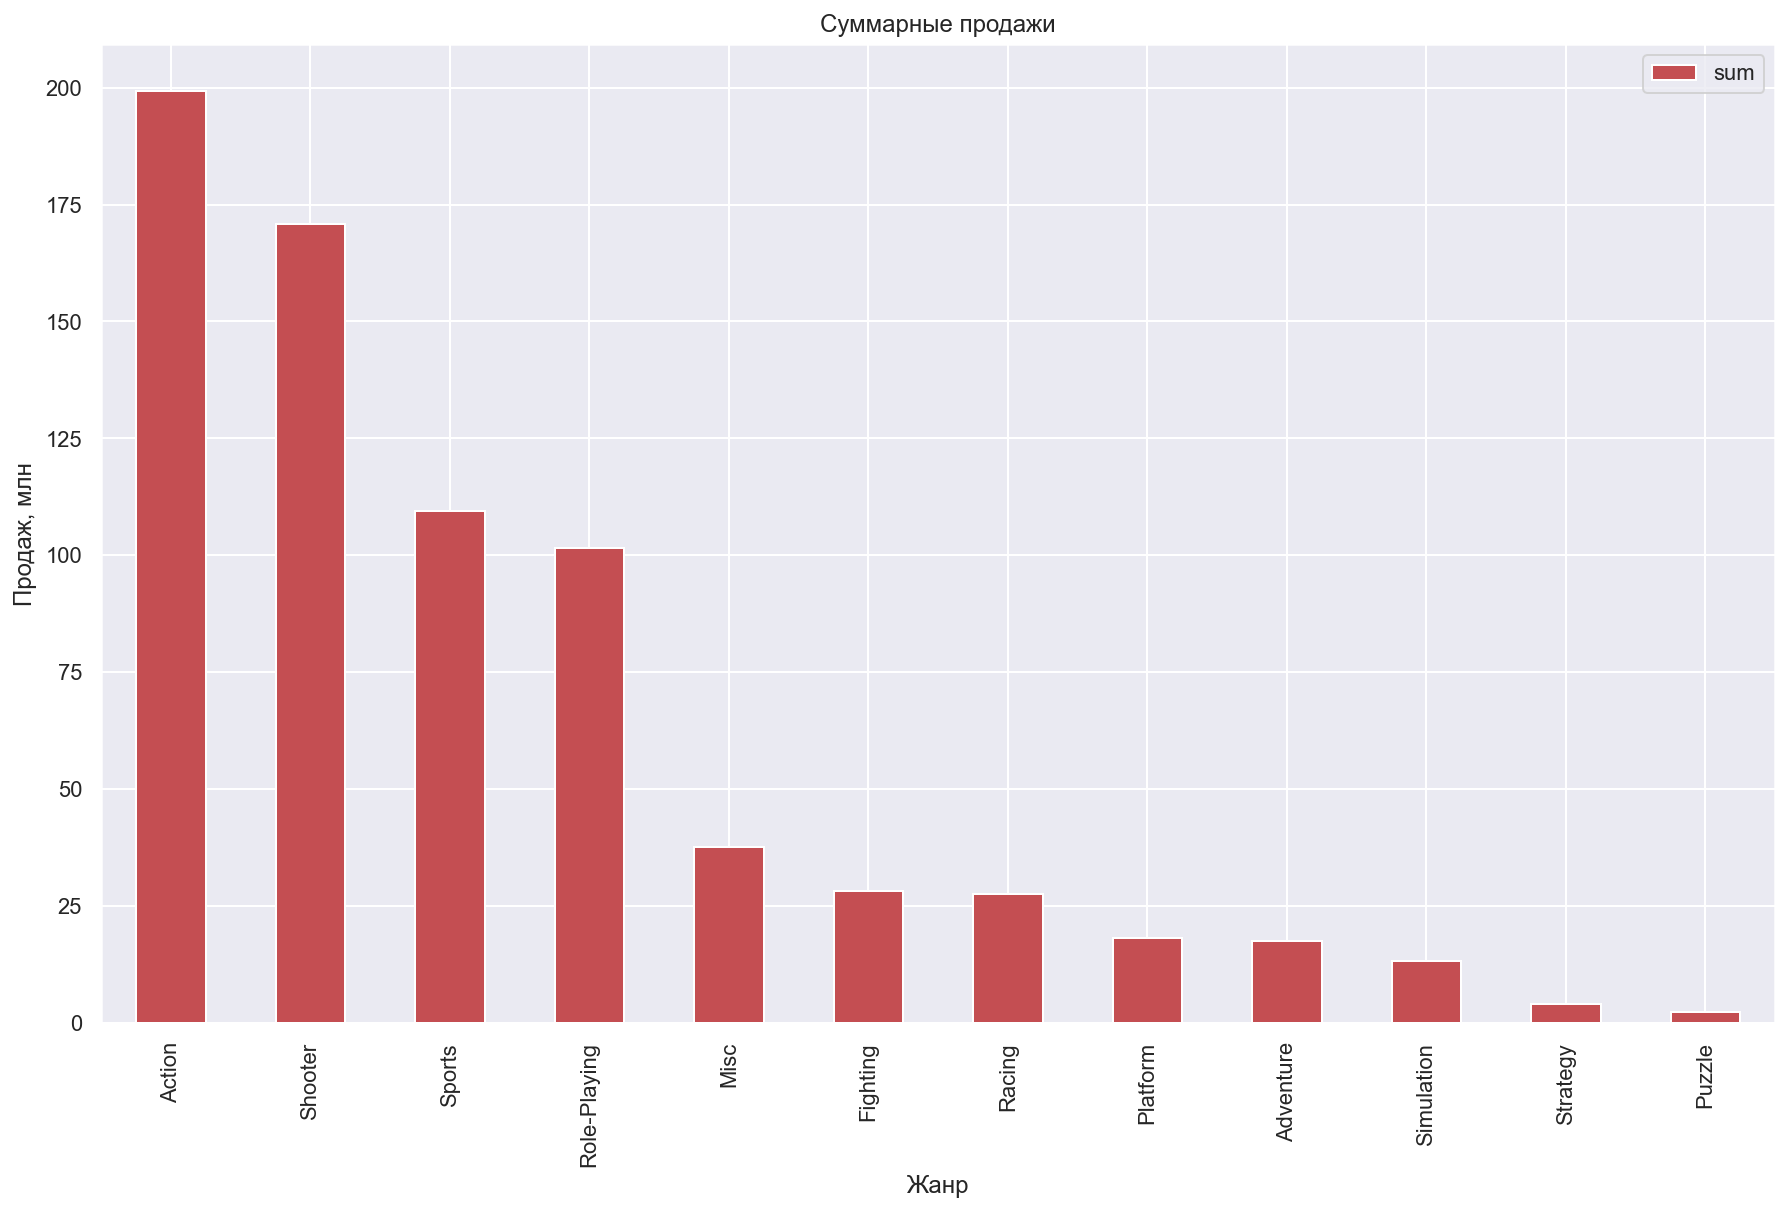

In [28]:
df_genre = df_actual.pivot_table(index='genre',values='total_sales', aggfunc={'sum','mean'})\
    .sort_values('sum',ascending=False)
# Построим график игр по жанрам
df_genre.plot(y='sum',kind='bar',color='r')
plt.title('Суммарные продажи')
plt.xlabel('Жанр')
plt.ylabel('Продаж, млн')
plt.show()

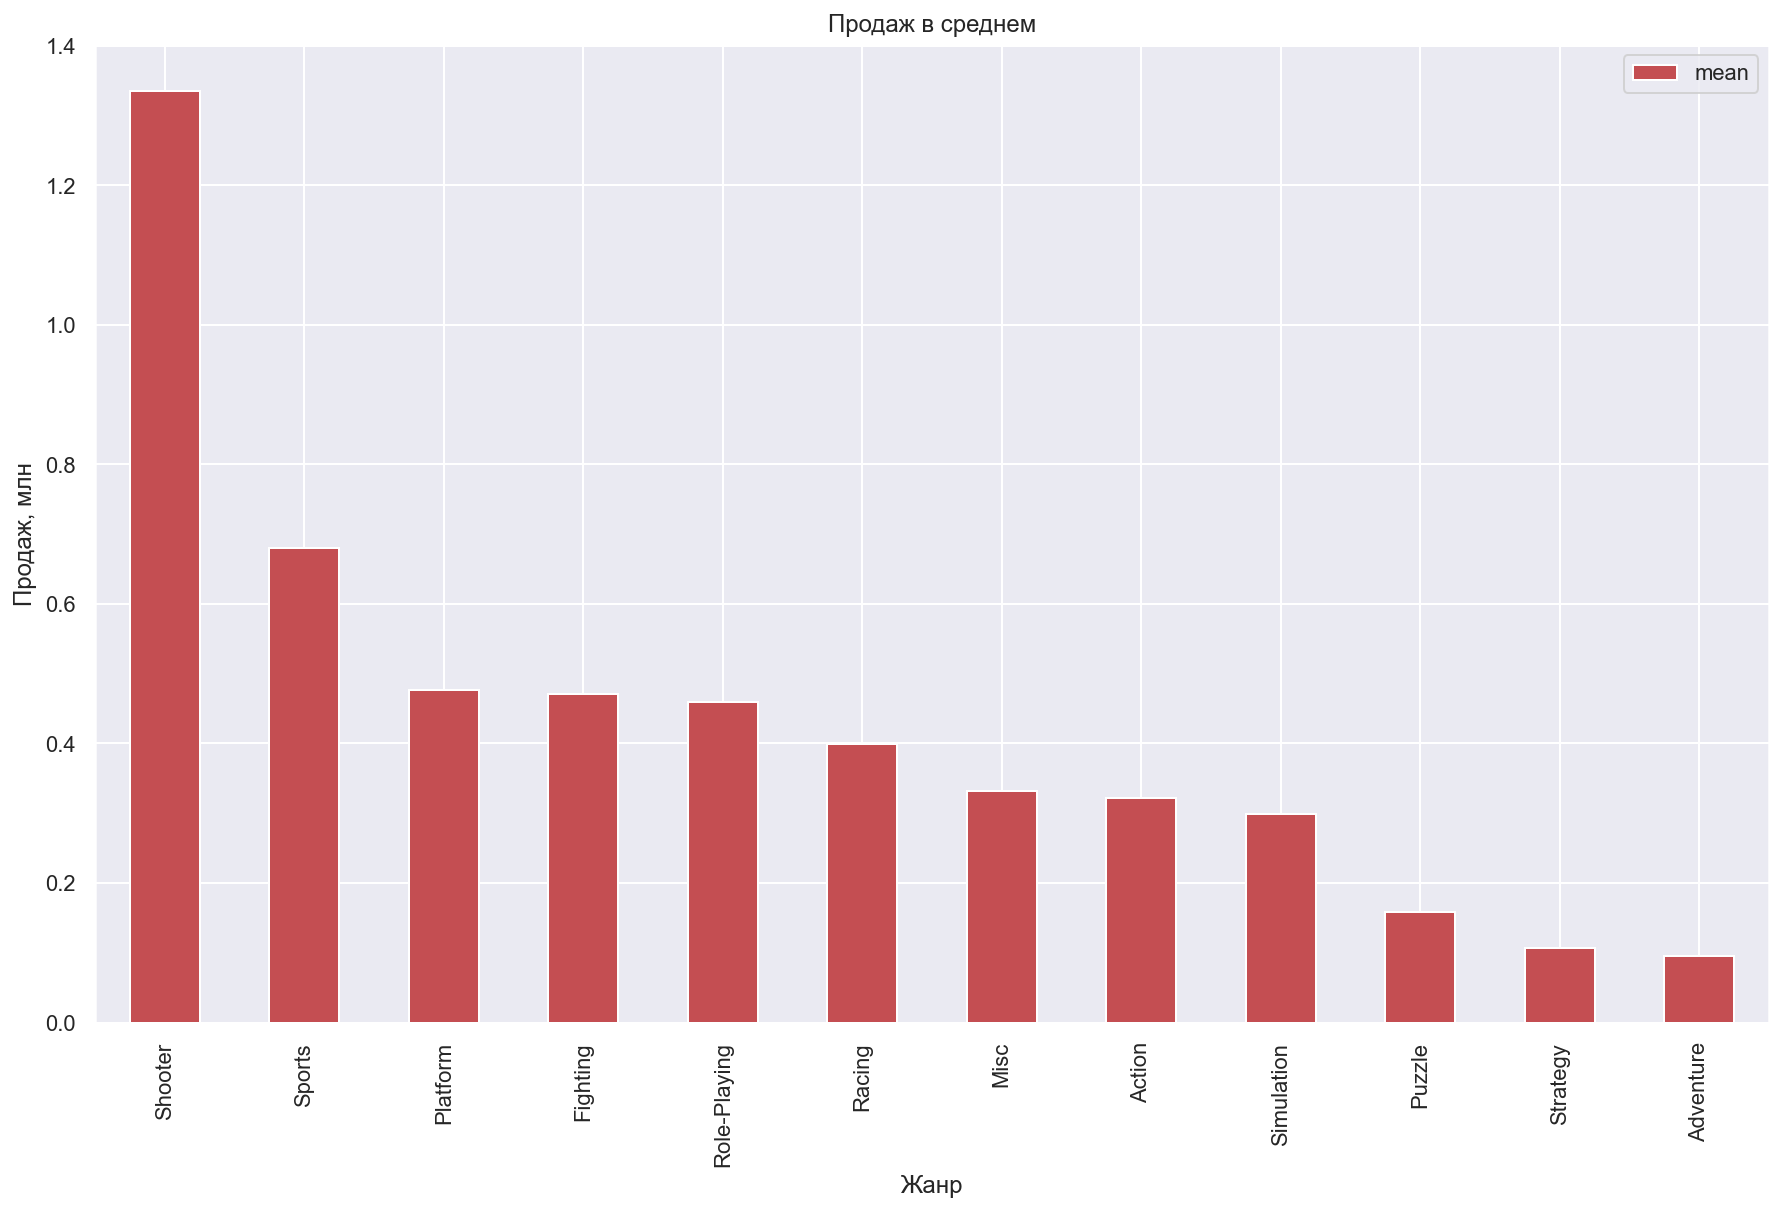

In [29]:
df_genre.sort_values(by='mean',inplace=True,ascending=False)
df_genre.plot(y='mean',kind='bar',color='r')
plt.title('Продаж в среднем')
plt.xlabel('Жанр')
plt.ylabel('Продаж, млн')
plt.show()

Подведем некоторые итоги прежде чем составить портрет пользователя:
- Длительность жизни платформы ~ 10 лет;
- Все еще актуальные платформы - PS4 и XOne;
- Общее количество продаж, а так же игр-хитов на PS4 больше чем у XOne за аналогичный период;
- Сильной корреляции между изученными нами величинами не обнаружено, хотя есть небольшая прямая зависимость между оценками пользователей и оценками критиков, и еще меньшая прямая зависимость между продажами и оценками критиков;
- Самыми же популярными играми являются игры в жанрах спорт, шутер и экшн;
- Самыми непопулярными жанрами являются пазлы и стратегии.

## Портрет пользователя каждого региона

In [30]:
def top5(column):
    """
    :param column: признак по которому нам необходимо выявить топ 5
    :return: таблица, состоящая из интересующего нас признака в регионе отсортированная в порядке убывания
    """
    df_top5 = df_actual.pivot_table(index=column, values=region, aggfunc='sum').sort_values(region, ascending=False)
    return df_top5.head(5)


In [31]:
def plot_top5(data : pd.DataFrame):
    """
    :param data: датасет по которому необходимо построить график
    :return: график
    """
    data.plot(y=region, legend=False,kind='bar', color='r')
    plt.title('Количество продаж')
    plt.ylabel('Продаж, млн')
    plt.show()

Регион: eu_sales
Параметр: platform


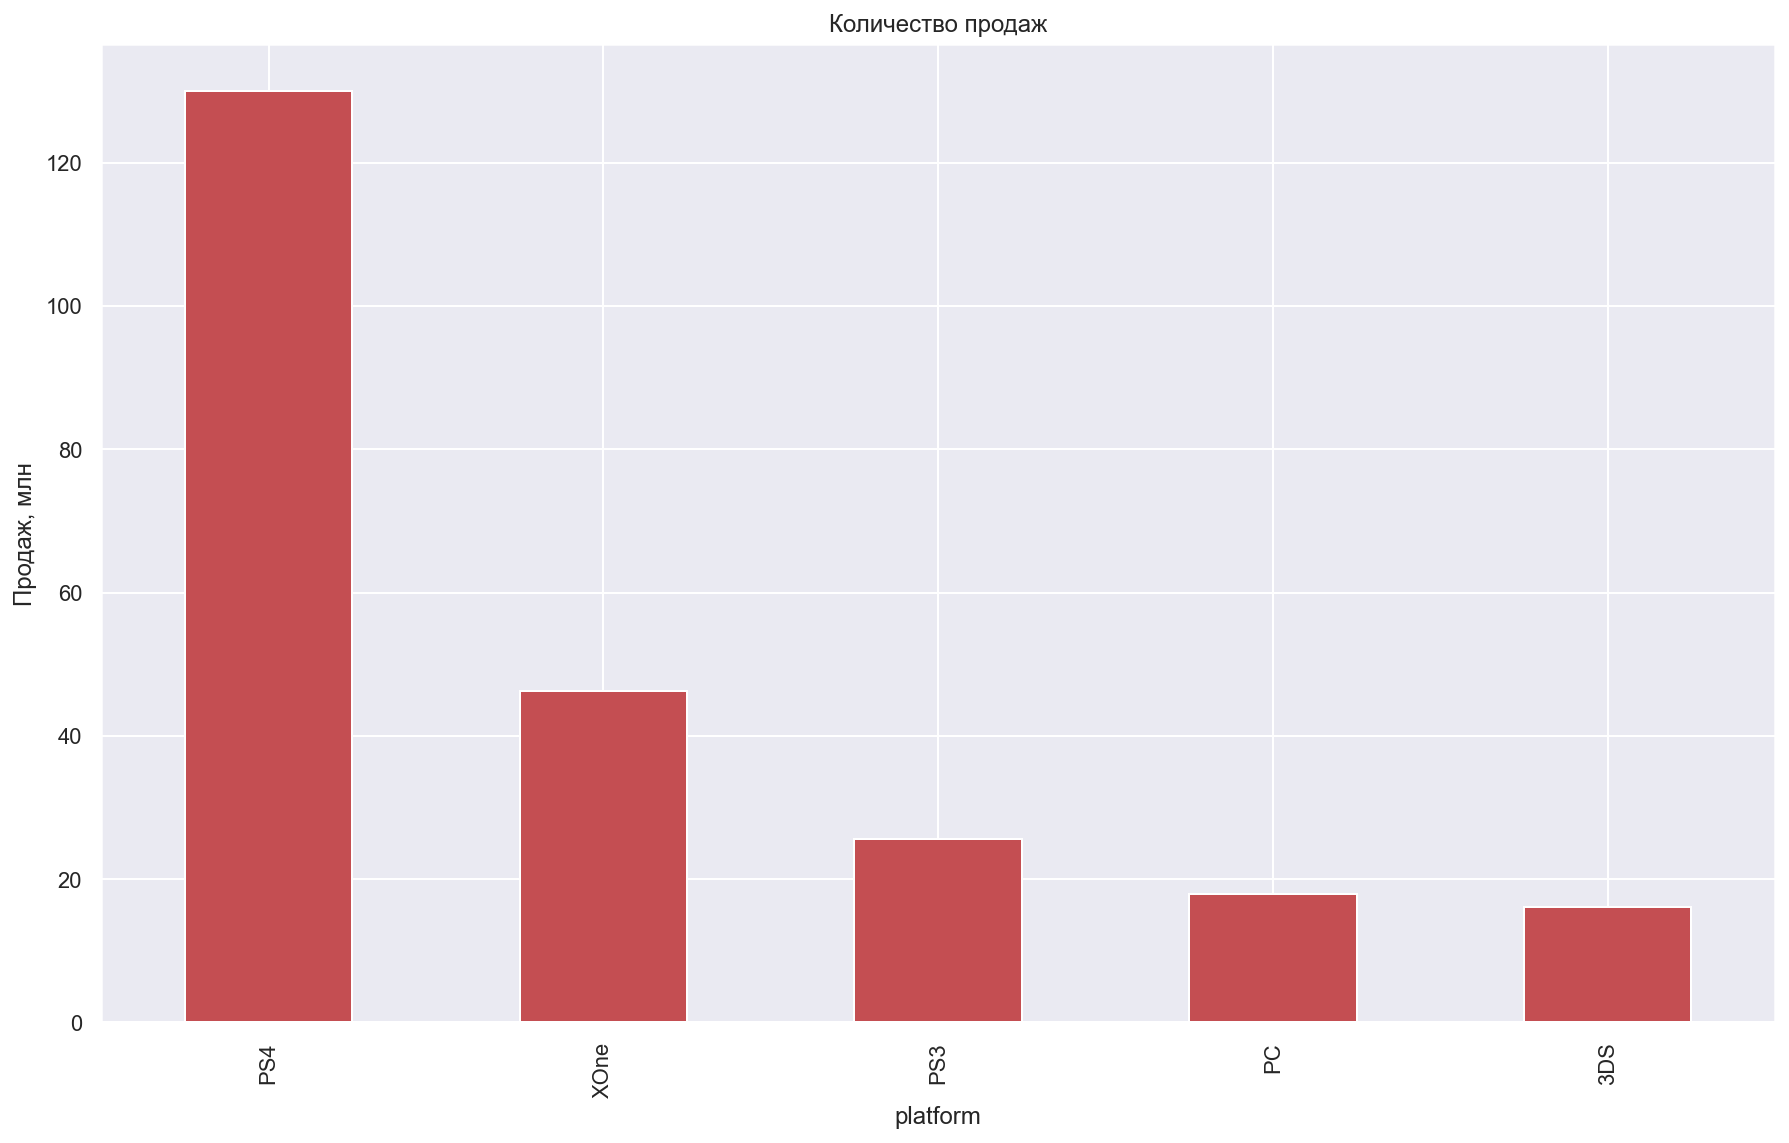

Регион: eu_sales
Параметр: genre


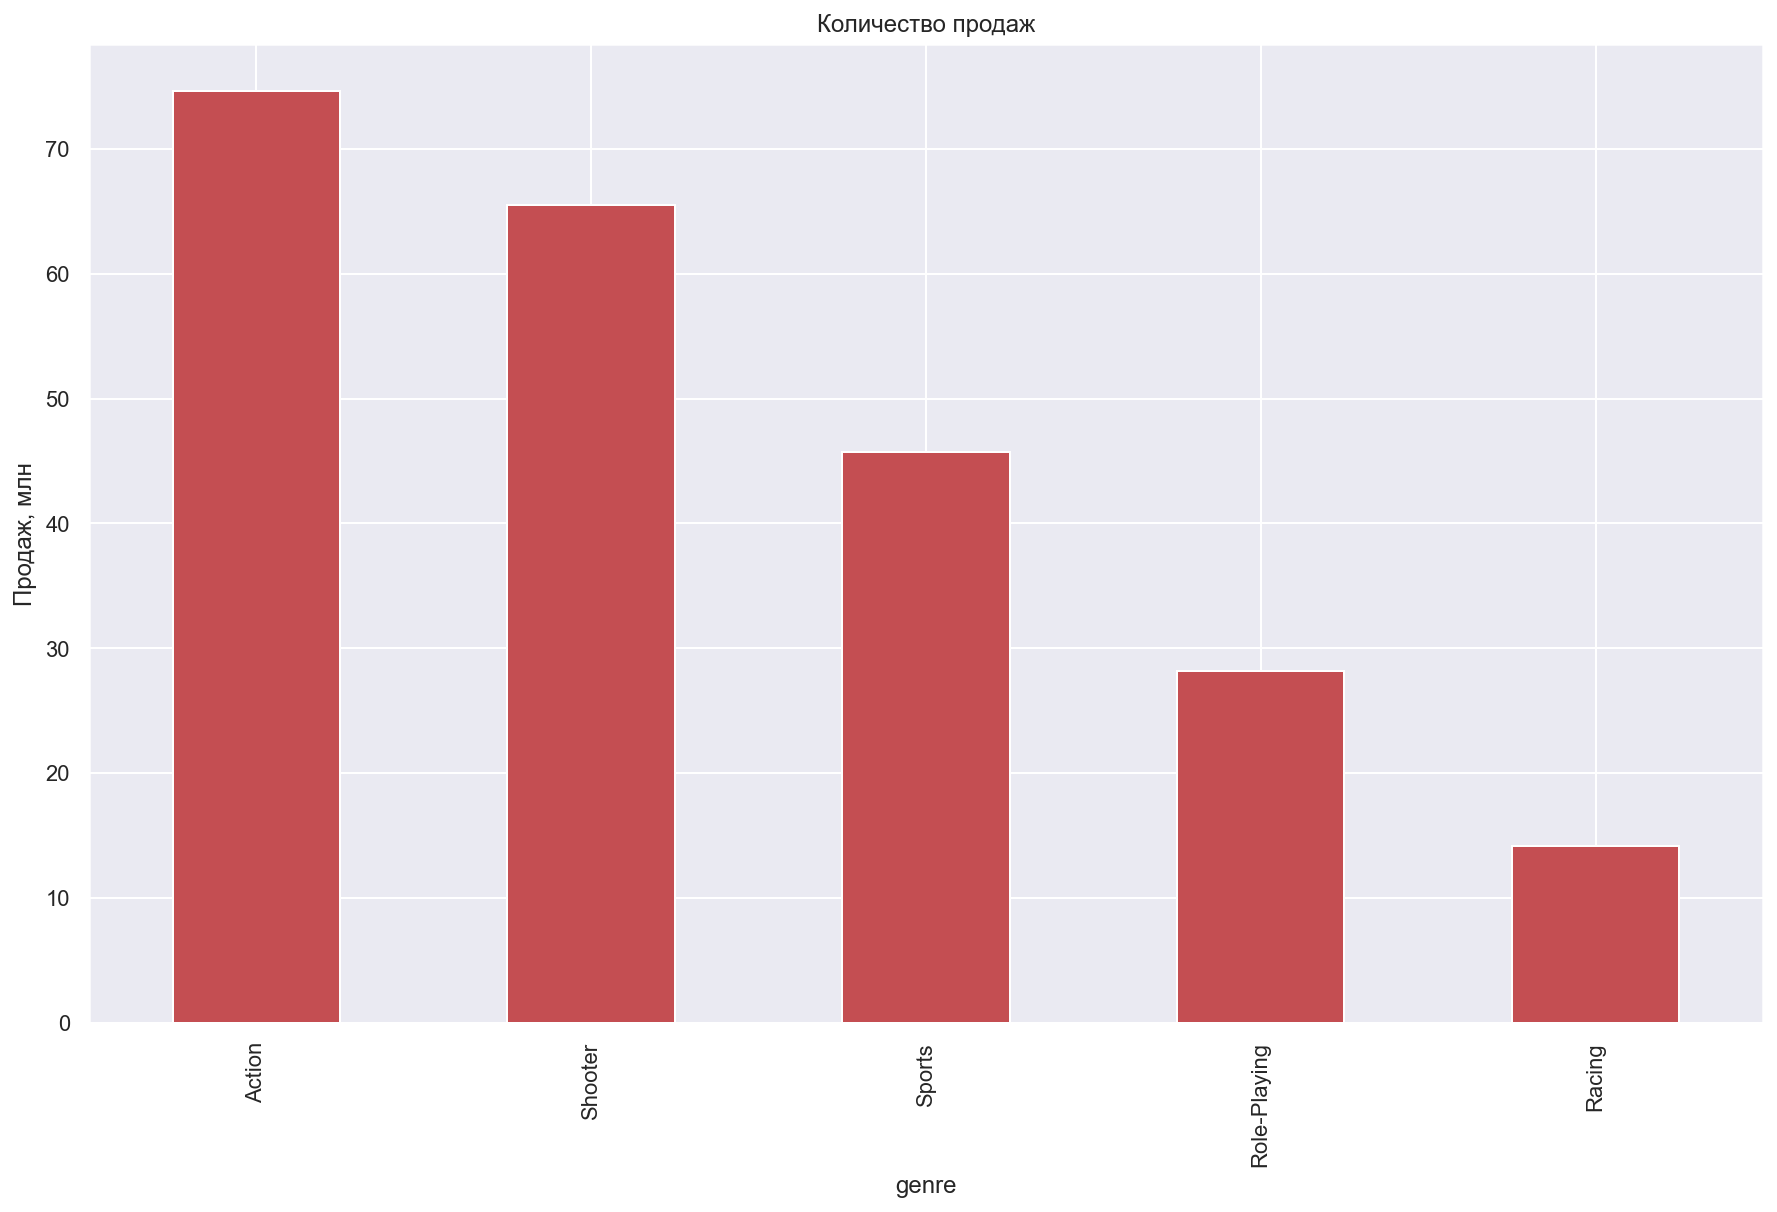

Регион: eu_sales
Параметр: rating


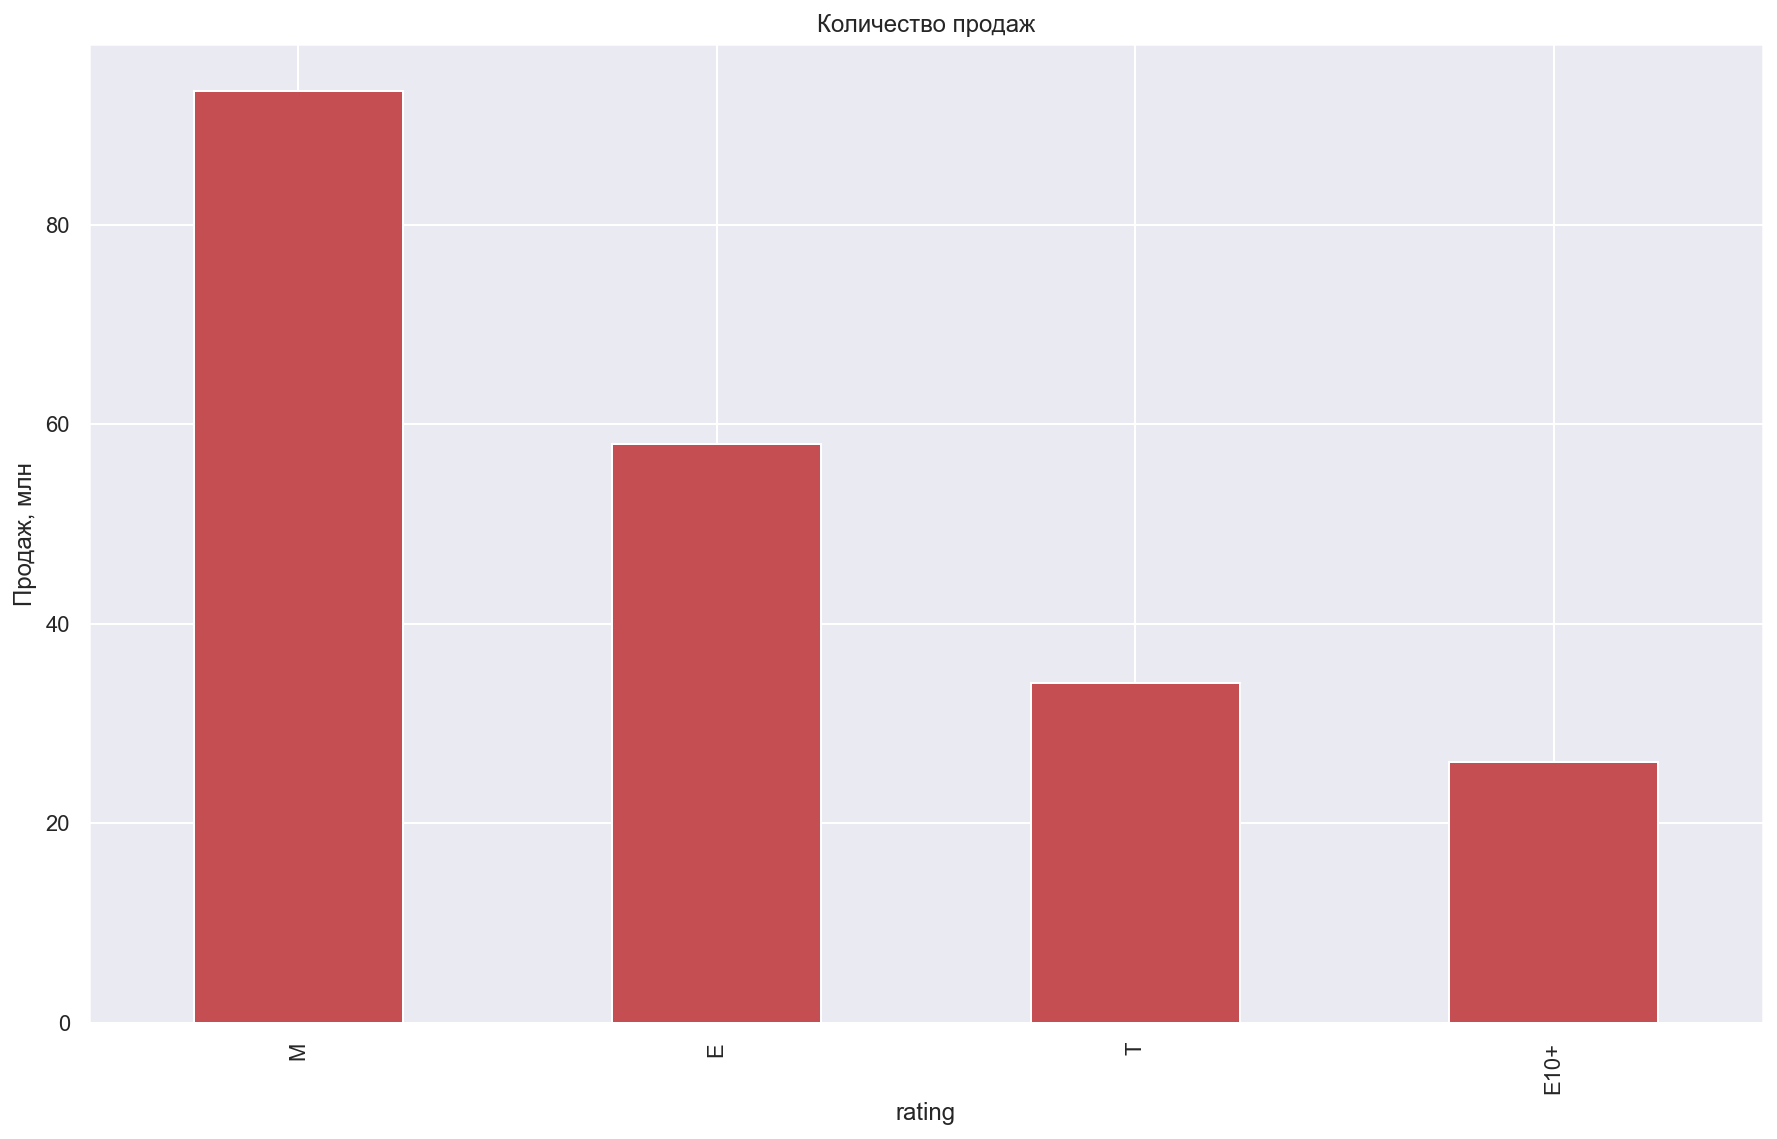

Регион: na_sales
Параметр: platform


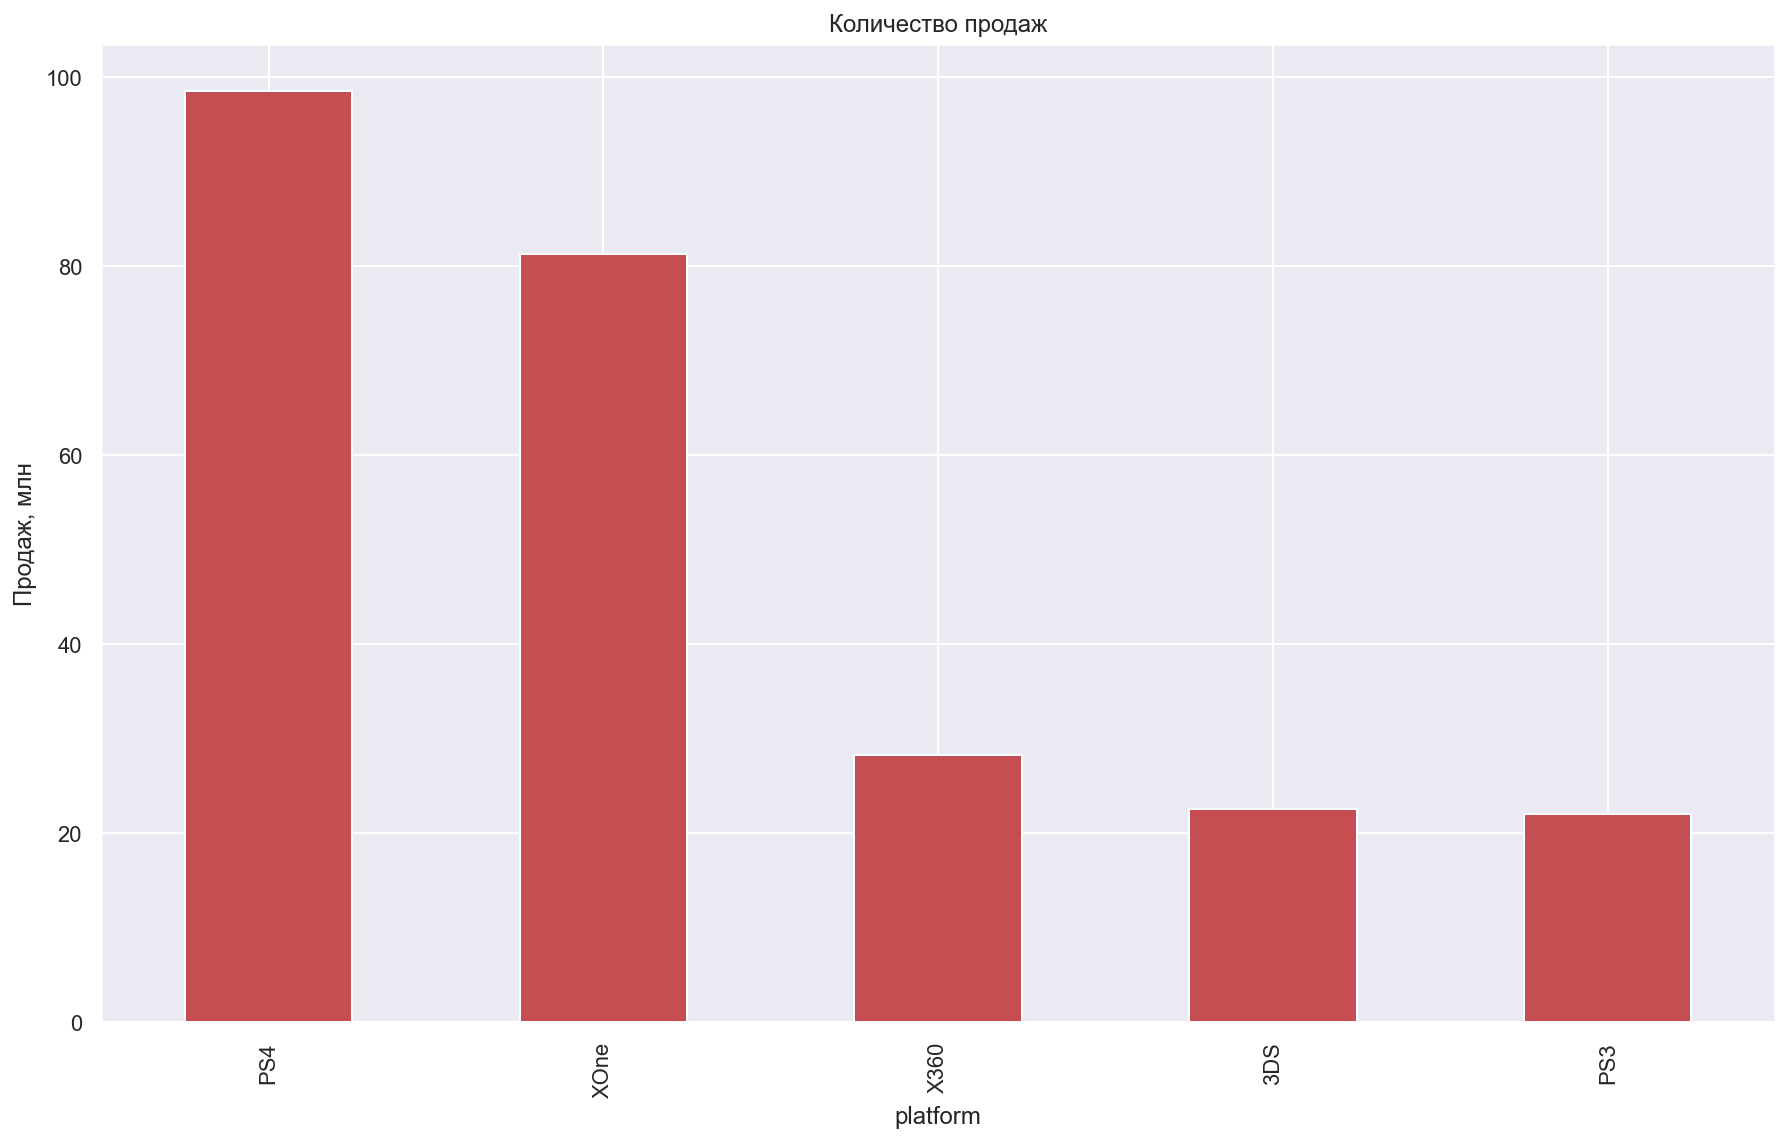

Регион: na_sales
Параметр: genre


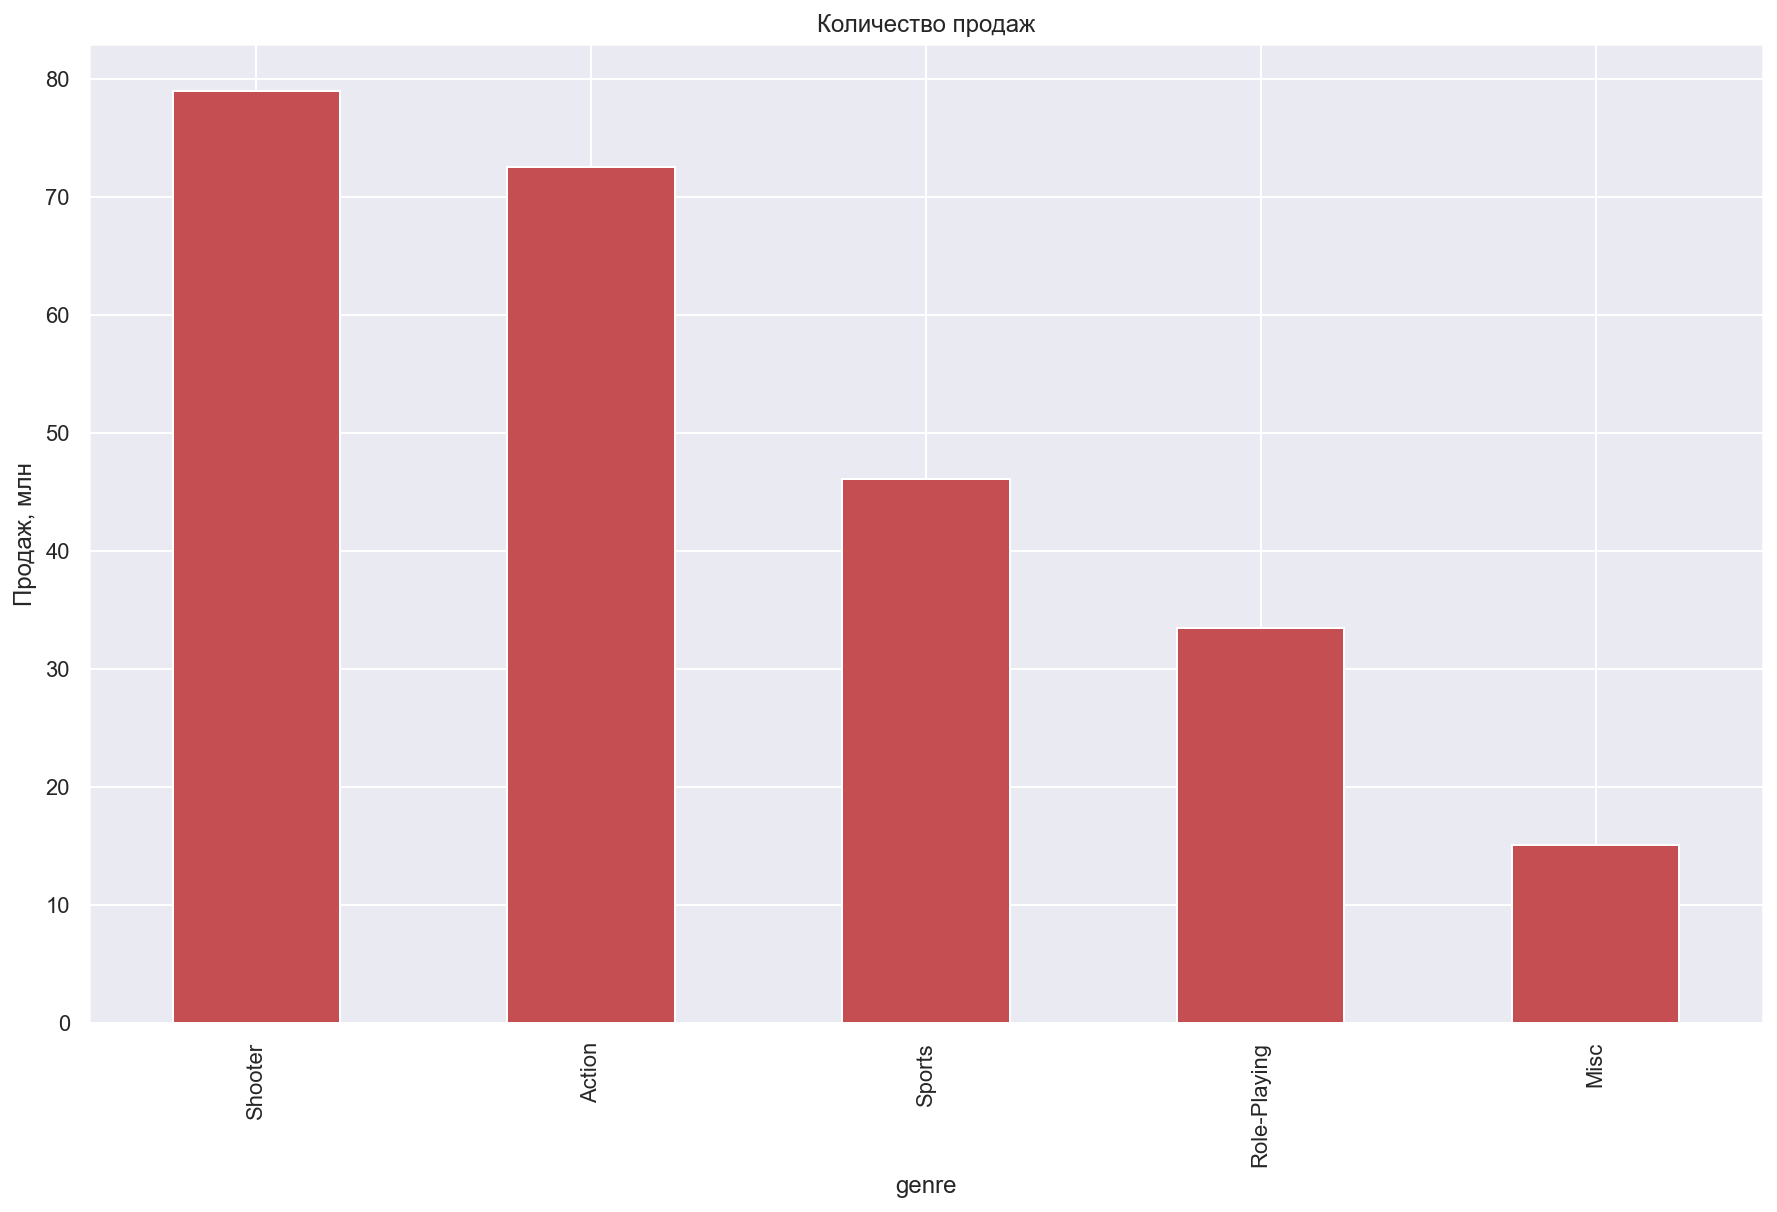

Регион: na_sales
Параметр: rating


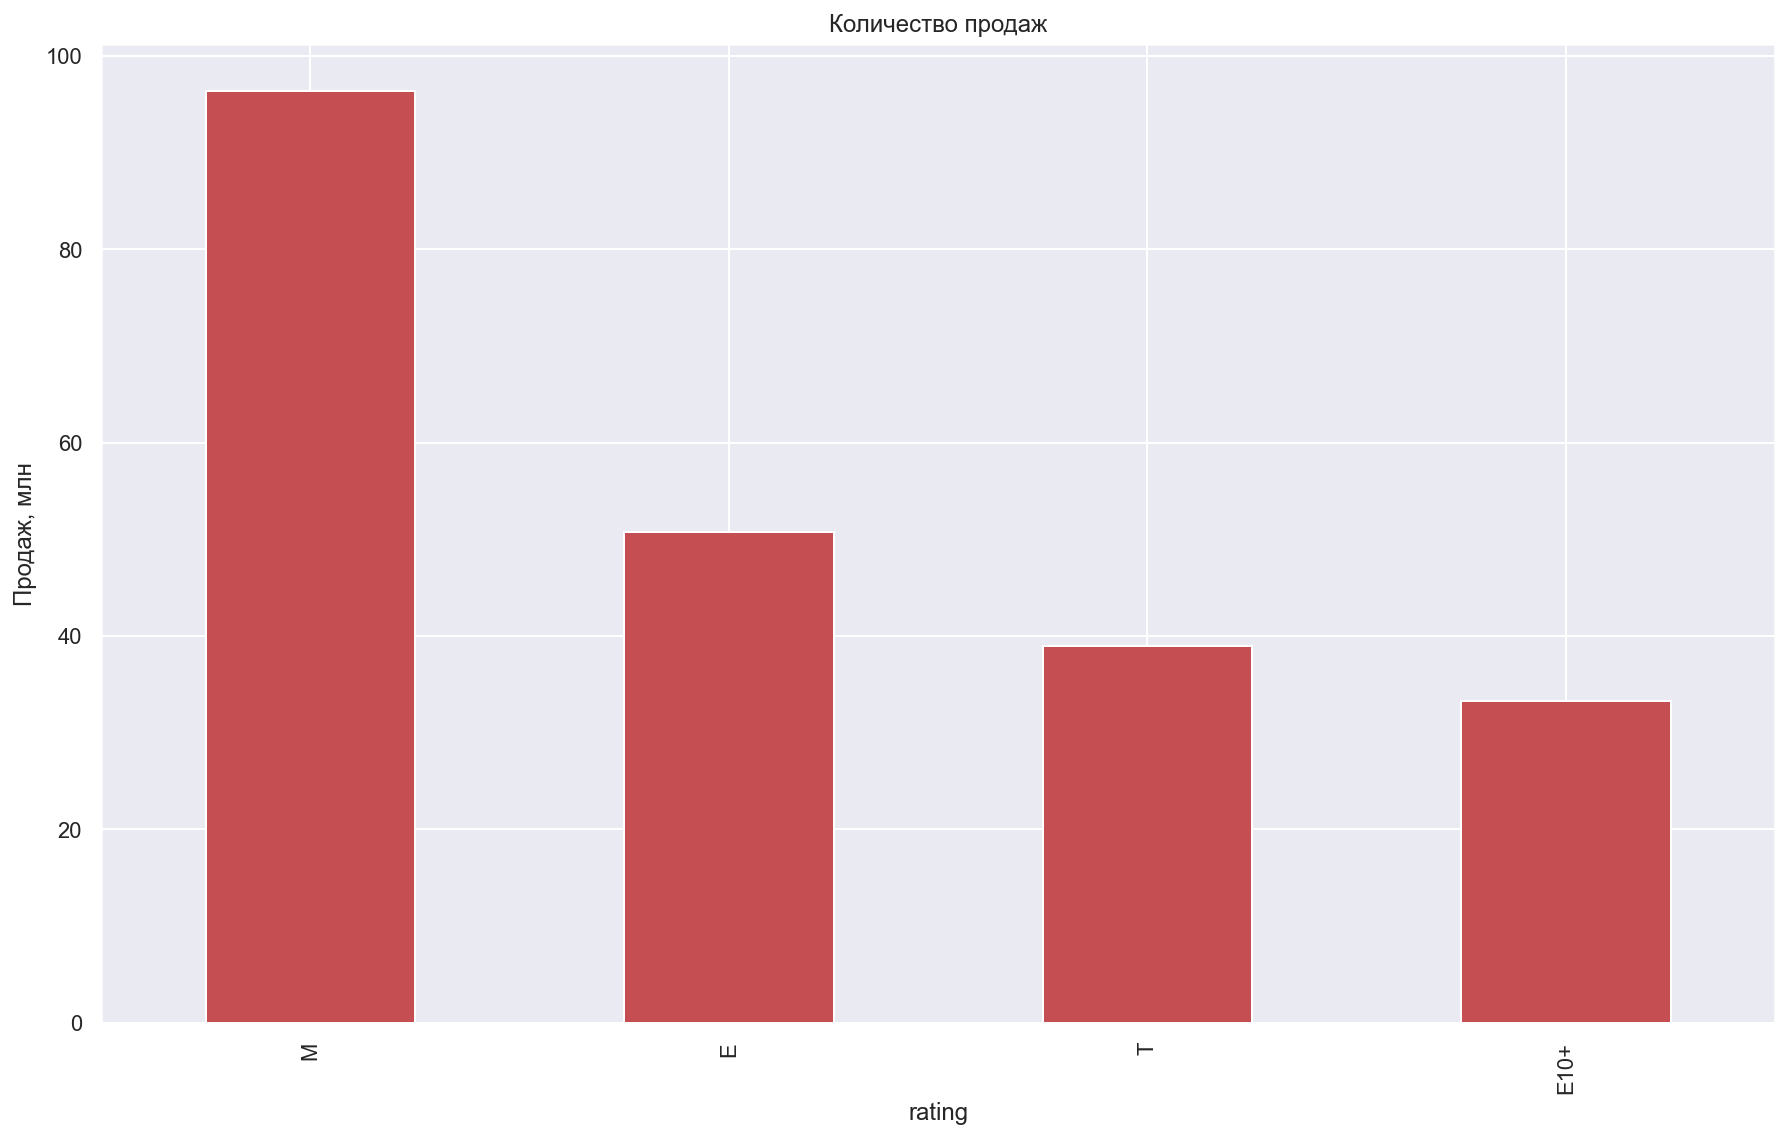

Регион: jp_sales
Параметр: platform


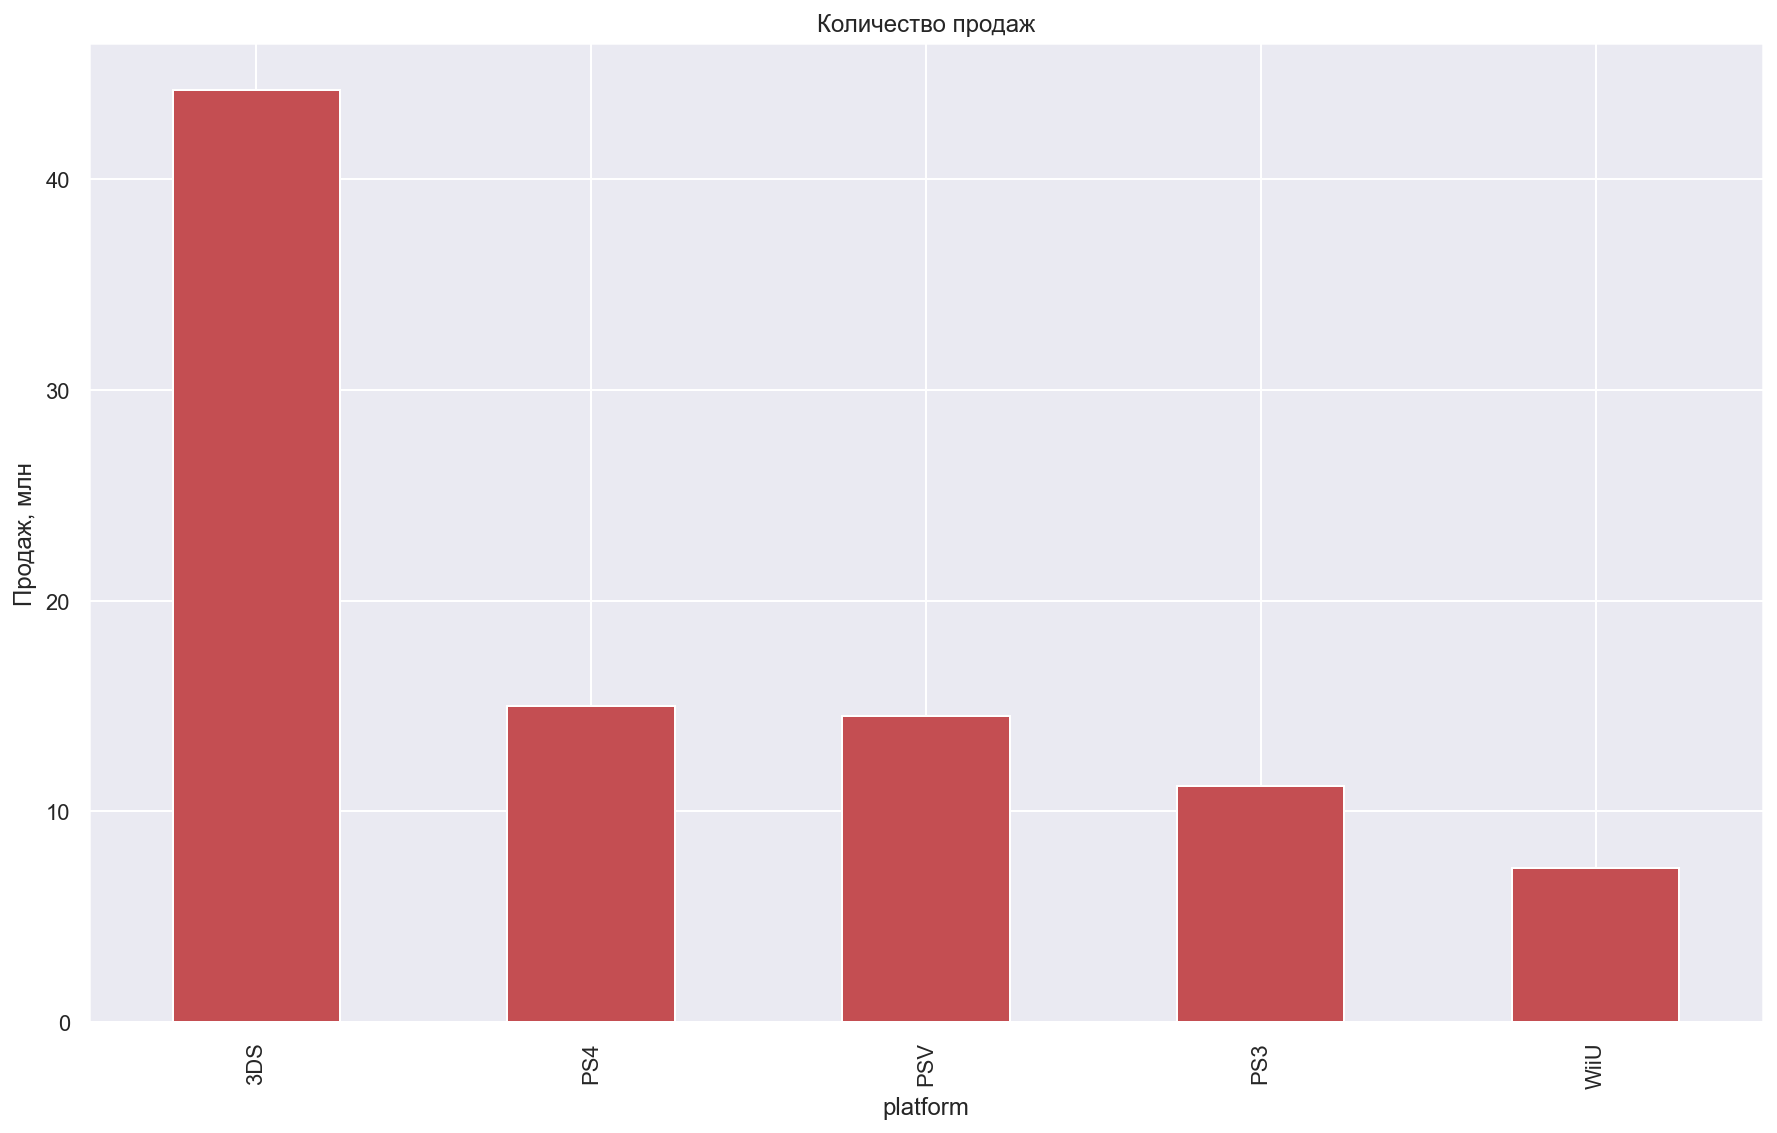

Регион: jp_sales
Параметр: genre


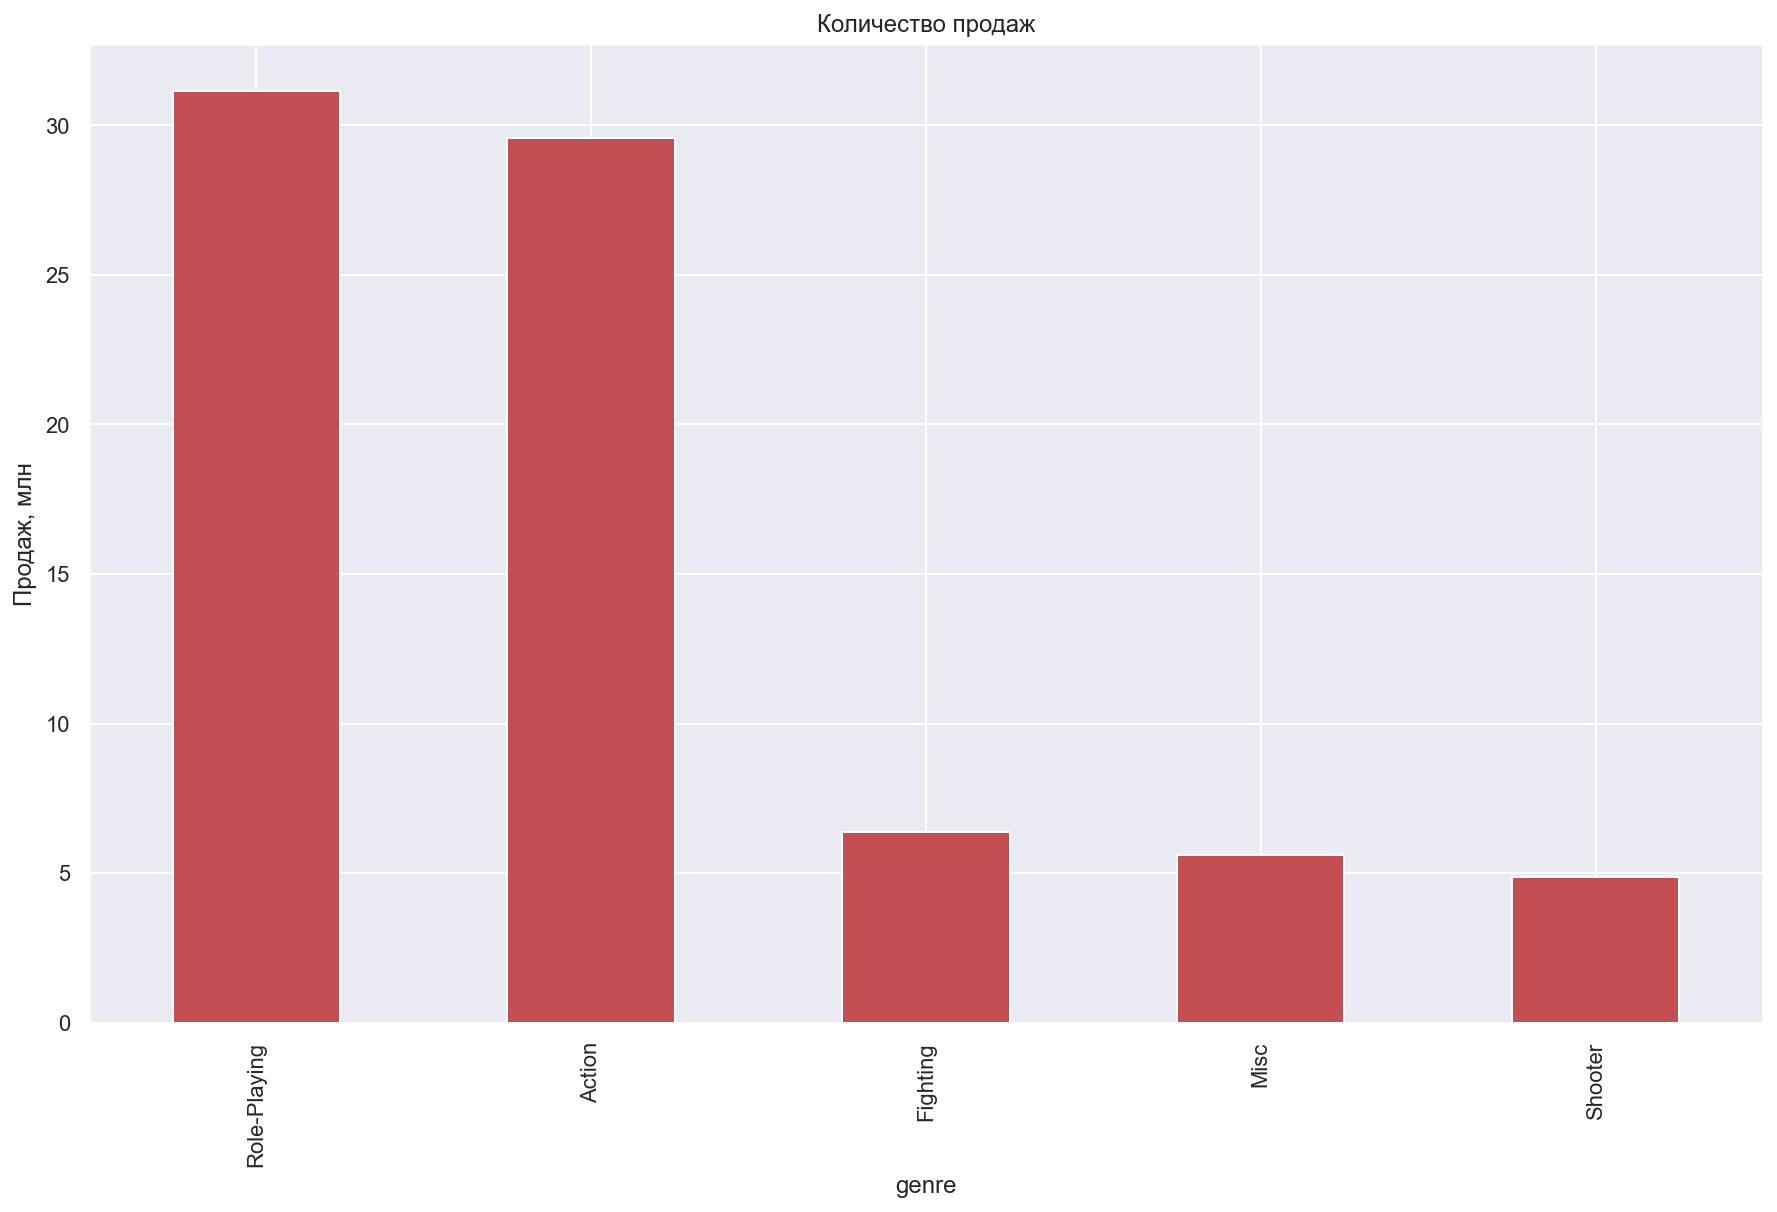

Регион: jp_sales
Параметр: rating


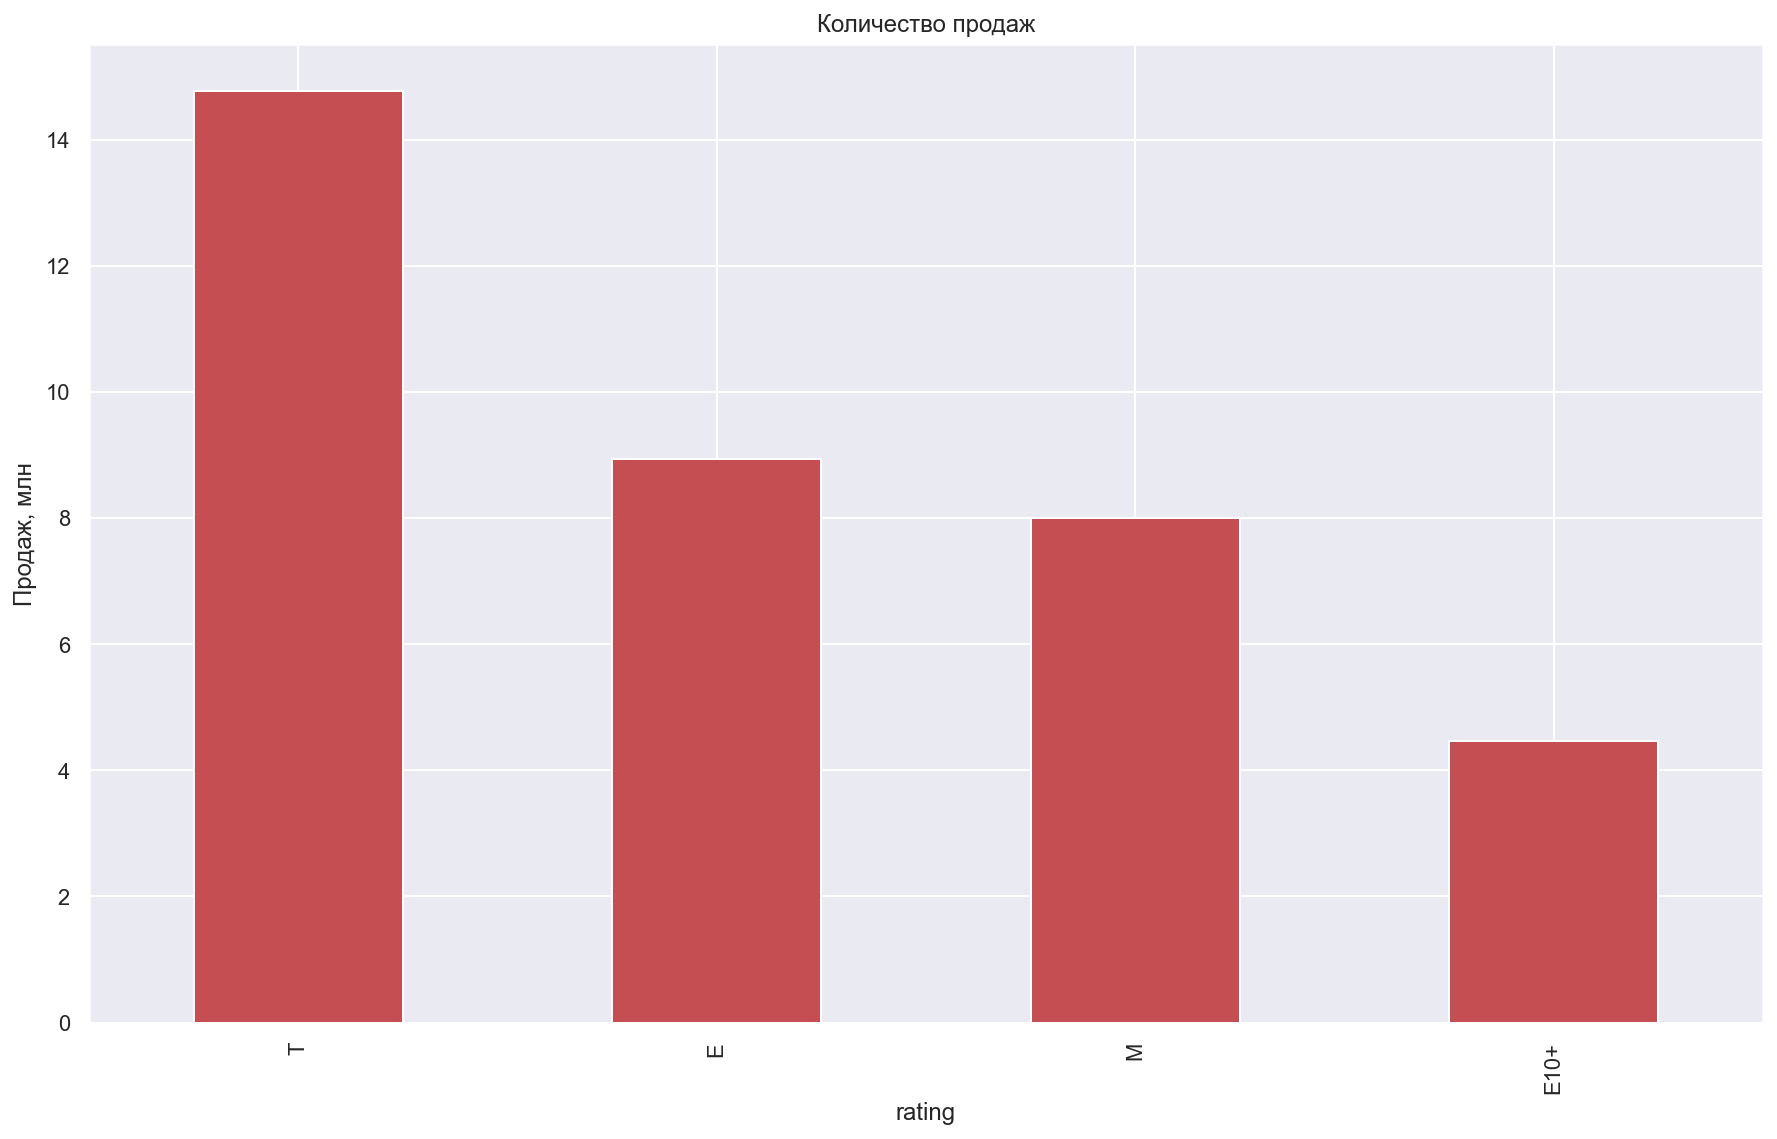

In [32]:
regions_to_show = ['eu_sales', 'na_sales', 'jp_sales']
params_to_show = ['platform', 'genre', 'rating']
for region in regions_to_show:
    for param in params_to_show:
        print(f'Регион: {region}')
        print(f'Параметр: {param}')
        plot_top5(top5(param))

**Европа:**
- Платформы
    - PS4 - 1 место с большим отрывом, XOne - 2 место;
- Жанр
    - Action - 1 место, Shooter - 2 место, Sport - 3 место;
- Рейтинг
    - M - 1 место, Е - 2 место, Т - 3 место;

 **Северная Америка:**
- Платформы
    - PS4 - 1 место, XOne - 2 место;
- Жанр
    - Shooter - 1 место, Action - 2 место, Sport - 3 место;
- Рейтинг
    - M - 1 место, Е - 2 место, Т - 3 место;

**Япония:**
- Платформы
    - 3DS - 1 место с большим отрывом, PS4 - 2 место;
- Жанр
    - Role-Playing - 1 место, Action - 2 место, Fighting - 3 место;
- Рейтинг
    - T - 1 место, Е - 2 место, M - 3 место;

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [33]:
# сформируем интересующие нас выборки
score_xone = df_actual[df_actual['platform'] == 'XOne']['user_score'].dropna()
score_pc = df_actual[df_actual['platform'] == 'PC']['user_score'].dropna()


In [34]:
def normal_test(data:pd.DataFrame,alpha=.05):
    """
    :param data: выборка
    :param alpha: p-value
    :return: отвергаем или не отвергаем нулевую гипотезе о нормальности распределения
    """
    if st.normaltest(data,nan_policy='omit')[1] < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

In [35]:
#def levene_test(data1:pd.DataFrame,data2:pd.DataFrame,alpha=.05):
#    """
#    :param data1: первая выборка
#    :param data2: вторая выборка
#    :param alpha: p-value
#    :return: отвергаем или не отвергаем нулевую гипотезе о равенстве дисперсий двух выборок
#    """
#    if st.levene(data1,data2)[1] < alpha:
#        print('Отвергаем нулевую гипотезу')
#    else:
#        print('Не удалось отвергнуть нулевую гипотезу')

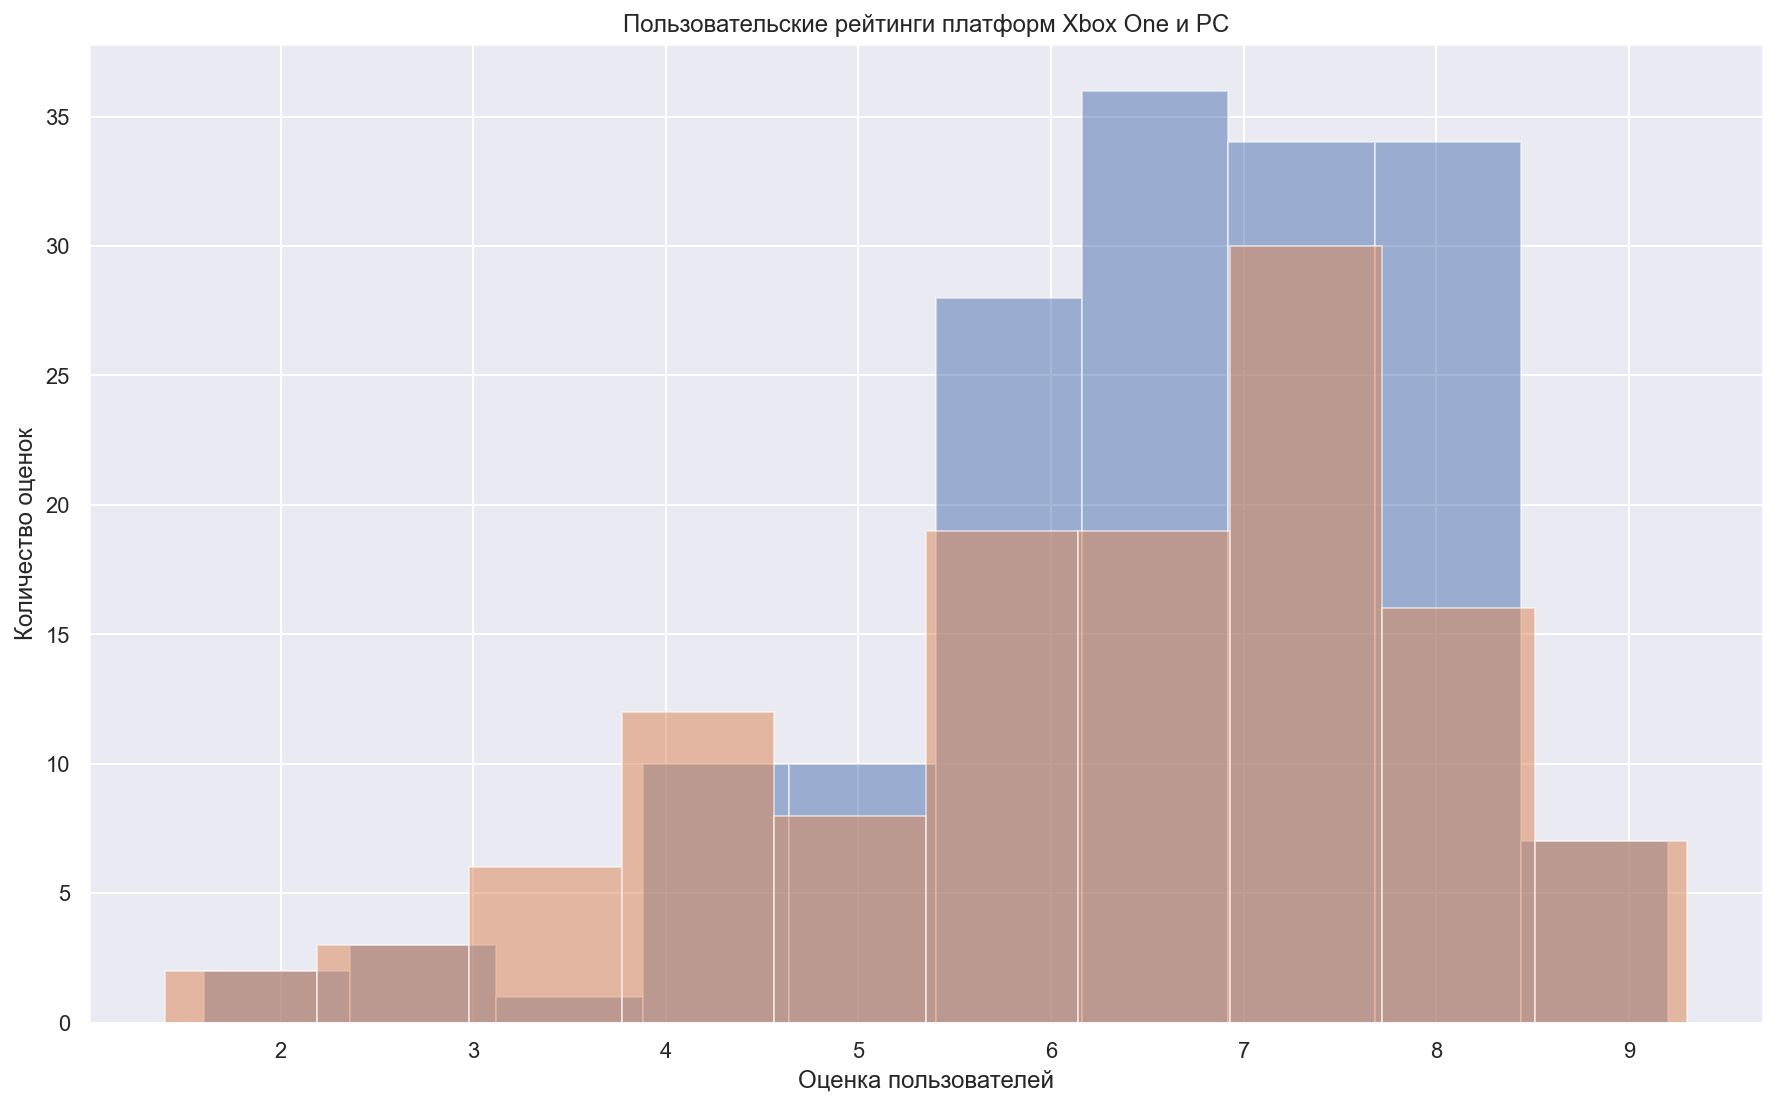

In [36]:
# посмотрим на распределения двух выборок
score_xone.hist(alpha=0.5)
score_pc.hist(alpha=0.5)
plt.title('Пользовательские рейтинги платформ Xbox One и PC')
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей')
plt.show()

In [37]:
# проверим на нормальность наши выборки
normal_test(score_xone), normal_test(score_pc)

Отвергаем нулевую гипотезу
Отвергаем нулевую гипотезу


(None, None)

In [38]:
# воспользуемся непараметрическим критерием U-критерием Манна — Уитни
def mannwhitneyu_test(data1,data2,alpha=.05):
    """
    :param data1: первая выборка
    :param data2: вторая выборка
    :param alpha: p-value, по умолчанию 0.05
    :return: отвергаем или не отвергаем гипотезу о равенстве средних двух выборок
    """
    if st.mannwhitneyu(data1,data2)[1] < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

**Нулевая гипотеза H₀** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза H₁** - средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые

**alpha** - 5%

In [39]:
mannwhitneyu_test(score_pc,score_xone)

Не удалось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу о равенстве средних двух выборок. Таким образом гипотеза
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не может быть отвергнута.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [40]:
# сформируем выборки
score_action = df_actual[df_actual['genre'] == 'Action']['user_score'].dropna()
score_sports = df_actual[df_actual['genre'] == 'Sports']['user_score'].dropna()

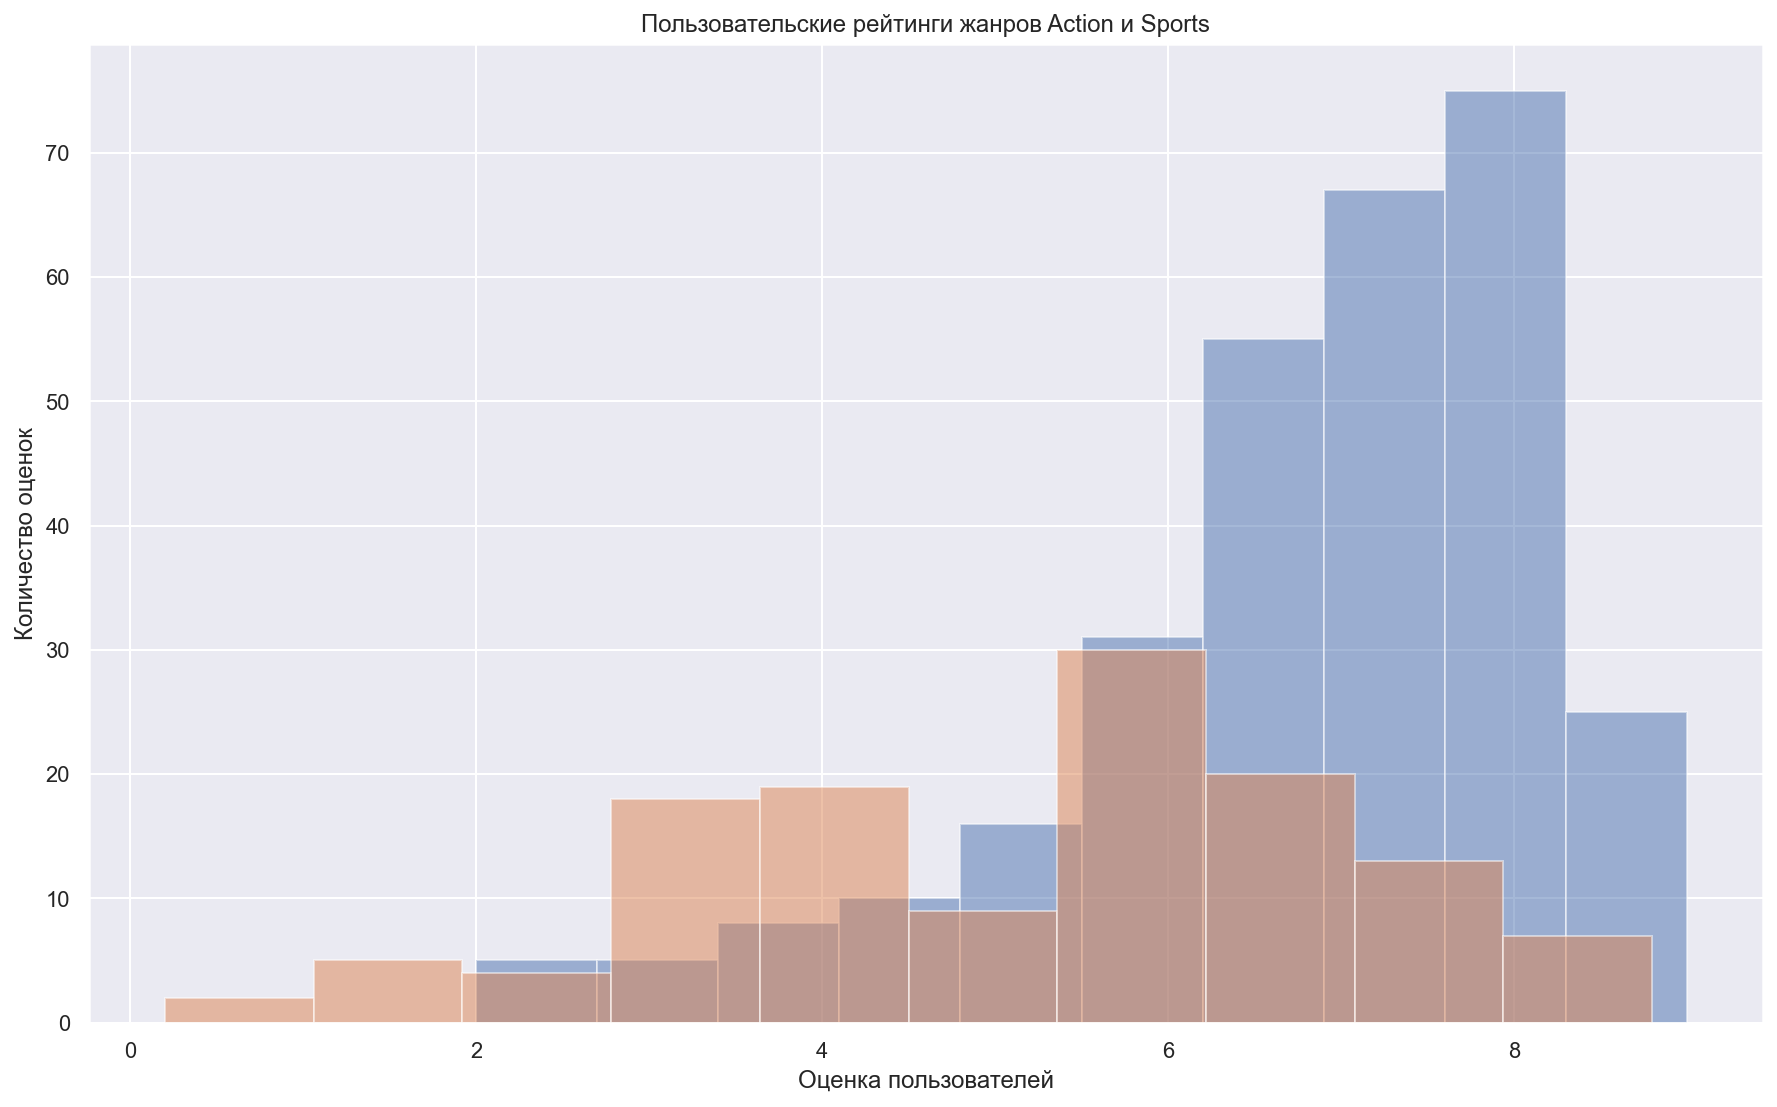

In [41]:
# посмотрим на распределения двух выборок
score_action.hist(alpha=0.5)
score_sports.hist(alpha=0.5)
plt.title('Пользовательские рейтинги жанров Action и Sports')
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей')
plt.show()

In [42]:
normal_test(score_sports), normal_test(score_action)


Не удалось отвергнуть нулевую гипотезу
Отвергаем нулевую гипотезу


(None, None)

Снова придется воспользоваться непараметрическим статистическим критерием

**Нулевая гипотеза H₀** - средние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза H₁** - средние пользовательские рейтинги жанров Action и Sports НЕ одинаковые

**alpha** - 5%

In [43]:
mannwhitneyu_test(score_action,score_sports)

Отвергаем нулевую гипотезу


Таким образом, мы видим, что разница средних значений двух выборок статистически значима. Мы можем отвергнуть нулевую
гипотезу.

## Общий вывод

Мы проанализировали рынок игр и выявили:
- средняя продолжительность жизни одной платформы составляет ~ 10 лет;
- перспективными на данный момент платформами остаются PS4 и XOne;
- PS4 прибыльнее чем XOne, мы видели по графикам разброса, что у PS4 значительно больше выбросов,
скорее всего это связано с большим количеством эксклюзивов на данную платформу;
- есть лишь небольшая прямая зависимость между оценками критиков и продажами игр. *Возможно*:
скорее всего это связано лишь с тем, что критики получают раннюю версию игры,
и под влиянием хороших оценок люди сразу же покупают игры с хорошими оценками.
Но чем больше проходит времени от выхода игры, тем более объективными становятся оценки пользователей
и очередной раз покупатель будет уже смотреть на них;
- такая же небольшая связь если и у оценок критиков и оценок пользователей. *Возможно*: на дистанции эта
прямая зависимость становится все меньше;
- самыми популярными жанрами за период 2013-2016 являются action, shooter, sports. Ничего удивительного,
три основных жанра, представителями которых завален каждый магазин игр;
- в Европе и Северной Америке самой популярной консолью является PS;
- В Северной Америке Xbox куда более популярен чем в Европе;
- самыми популярными играми и в Европе и в Америке являются игры с рейтингом М;
- игры с ограничением Е чуть более популярны в Европе чем в Америке, но в обоих регионах находятся на 2-ом месте;
- рынок игр Японии совершенно отличается: самым популярным жанром является RPG, а любимыми платформами
являются портативные консоли от Nintendo. Рейтинг самых популярных игр в Японии - T;

**Гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые **ПОДТВЕРЖДЕНА**
- Средние пользовательские рейтинги жанров Action и Sports разные **ПОДТВЕРЖДЕНА**

Рекомендации: сделать упор на игры для приставок PS4 и XOne, лучше всего на эксклюзивы в жанрах action,
shooter или sports с возрастным ограничением M и Е. Так мы сможем покрыть интерес двух регионов из трех и
скорее всего получить наибольшую выгоду.